# Final Project: Credit Card Fraud Detection 

Credit card fraud detection is a major concern in the financial sector, and it requires effective methods to identify suspicious transactions. In this project, I used unsupervised learning techniques that group transactions without relying on labeled fraud data. Unlike supervised learning—where models are trained using known examples of fraudulent and legitimate transactions—unsupervised methods such as K-Means and DBSCAN uncover hidden patterns and highlight unusual behaviors. The goal is to cluster similar transactions and detect anomalies that may point to potential fraud.

### Exploratory Data Analysis (EDA)

- Loaded and inspected the dataset to understand transaction count, feature types, and missing values.

- Handled missing data through removal or imputation to ensure clean inputs for clustering.

- Selected relevant features, dropping identifiers and non-informative categorical fields.

- Scaled numerical variables using StandardScaler to improve clustering performance.

- Visualized data trends through histograms, boxplots, and scatterplots to identify outliers and understand spending patterns.

### Model Building & Analysis

**K-Means Clustering**

- Partitions transactions into K groups based on similarity.

- Helps distinguish normal, unusual, and potentially fraudulent behavior patterns.

**DBSCAN (Density-Based Clustering)**

- Detects clusters based on point density rather than predefined cluster counts.

- Very effective at identifying outliers, which may correspond to fraudulent transactions.

**PCA**

- Reduces high-dimensional features to 2–3 components while retaining most variance.

- Enables clearer visual separation of clusters and highlights isolated or extreme points.

#### Important Libraries for project

Important libraries for data analysis and visualization.
- NumPy and Pandas handle numerical computations and data processing.
- Seaborn and Matplotlib help visualize trends.
- SciPy supports statistical analysis, and warnings are suppressed for cleaner output.

In [62]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings(action = 'ignore')

#### Loading and Exploring the Dataset

- The dataset is loaded using Pandas from a CSV file (credit-card-fraud-data.csv).
- The shape of the data (number of rows and columns) is displayed to understand its size. 
- The describe() function provides summary statistics, including mean, standard deviation, minimum, and maximum values, helping to understand the distribution of numerical features.

In [63]:
data = pd.read_csv("/Users/kashmiratare/Documents/MSAI/Unsupervised ML/Final_Project/credit-card-fraud-data.csv")
print("Data set Shape :", data.shape)
data.describe()

Data set Shape : (8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Using head() displays the top five rows, providing an initial look at the dataset’s structure, features, and sample entries for early understanding.

In [64]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


The isna().sum() function provides a count of missing values across all columns, highlighting any incomplete or inconsistent data. Detecting these gaps early helps guide the data-cleaning process and ensures the dataset is reliable for further analysis and modeling.

In [65]:
data = data.drop(columns='CUST_ID', axis=1, errors='ignore')
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [67]:
data = data.interpolate()
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Visualizing 

Using data.corr(), a correlation matrix is created to measure the relationships between all numerical features. A Seaborn heatmap is then used to visualize these correlations, with varying color shades indicating different strengths. This visualization helps pinpoint strongly correlated features, supporting decisions on dimensionality reduction and feature selection.

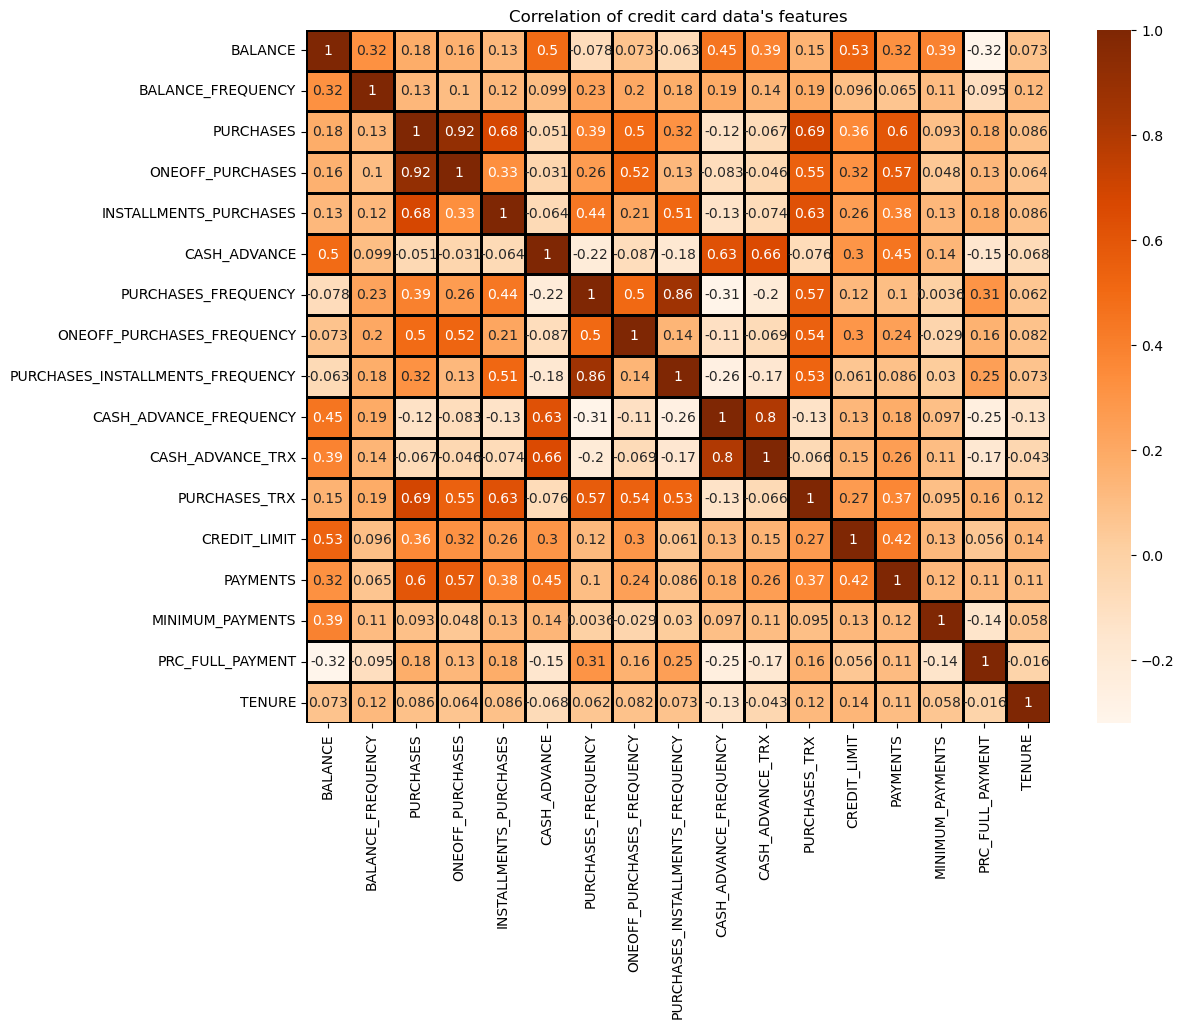

In [68]:
# First, select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now calculate correlation with only numeric columns
data_correlate = numeric_data.corr()

# Create the heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(data_correlate, linecolor = 'black', linewidth = 1, annot = True, cmap='Oranges')
plt.title('Correlation of credit card data\'s features')
plt.show()

### Outlier Detection Using Z-Scores

This method identifies outliers in a dataset by calculating Z-scores for each data point. Here's the approach in detail:

- Z-scores quantify how far a data point is from the mean of the dataset, measured in standard deviations.

- By using the absolute value of Z-scores, the focus is on the magnitude of deviation, regardless of whether the value is above or below the mean.

- Typically, data points with an absolute Z-score greater than a chosen threshold (commonly 3) are considered outliers, as they lie far from the majority of the data.

- This method is particularly effective for detecting extreme values in normally distributed datasets.

Using Z-scores for outlier detection helps improve the robustness of statistical analyses and prevents extreme values from skewing results.

In [69]:
from scipy import stats
z_score = np.abs(stats.zscore(data))
print(z_score)

[[0.73198937 0.24943448 0.42489974 ... 0.30931497 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08825036 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10142893 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33364691 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34501037 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33114491 0.52555097 4.12276757]]


### Filtering Outliers and Inspecting Cleaned Data

- **Filter Outliers:** Creates data_outlier_free by keeping rows where all Z-scores are below 3, ensuring only non-extreme values remain.

- **Check Shape:** Displays the shape of the cleaned dataset to see the number of remaining rows and columns.

- **Inspect Data:** Uses .head() to preview the first few rows and verify the cleaning.

This ensures the dataset is free of extreme values while maintaining its structure.

In [70]:
print(data.shape)
data_outlier_free = pd.DataFrame(data[(z_score < 3).all(axis=1)], columns = data.columns)
print(data_outlier_free.shape)
data_outlier_free.head()

(8950, 17)
(7433, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,436.038012,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Standardization with StandardScaler

This code standardizes the cleaned dataset (data_outlier_free) using StandardScaler from sklearn.preprocessing:

- **Import and Initialize:** StandardScaler is imported and an instance (scaler) is created.

- **Fit and Transform:** The scaler’s fit_transform() method is applied to the dataset, rescaling the features so that each has a mean of 0 and a standard deviation of 1.

- **Purpose:** Standardizing ensures that all features are on the same scale, which is crucial for many machine learning algorithms and statistical analyses.

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_outlier_free)
data_standardized = pd.DataFrame(data_standardized, columns = data.columns)
data_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809720,-0.335494,-0.641527,-0.543552,-0.448135,-0.543884,-0.805290,-0.668856,-0.698435,-0.690747,-0.587329,-0.665326,-1.021782,-0.762965,-0.568225,-0.531569,0.311998
1,1.273134,0.090772,-0.734563,-0.543552,-0.636673,4.671774,-1.225838,-0.668856,-0.910691,0.883779,0.427635,-0.797605,1.021919,1.952976,0.617083,0.232555,0.311998
2,0.807149,0.517039,0.019451,0.430771,-0.636673,-0.543884,1.297443,2.808074,-0.910691,-0.690747,-0.587329,-0.003933,1.192228,-0.470387,0.051570,-0.531569,0.311998
3,0.261344,-1.188028,0.727299,1.345438,-0.636673,-0.377295,-1.015565,-0.379113,-0.910691,-0.165907,-0.333588,-0.731466,1.192228,-0.903455,-0.191439,-0.531569,0.311998
4,-0.297952,0.517039,-0.718960,-0.523390,-0.636673,-0.543884,-1.015565,-0.379113,-0.910691,-0.690747,-0.587329,-0.731466,-0.953659,-0.431215,-0.434449,-0.531569,0.311998


### Finding the Best Number of Clusters with the Elbow Method

- **Goal:** Identify the ideal number of clusters for K-Means by checking how much the total distance within clusters (inertia) decreases as we add more clusters.

**Process:**

- **Setup:** Decide on a maximum number of clusters to test (e.g., 30). Prepare a list to save inertia values.

- **Loop Through clusters:** For each number of clusters from 1 to 30:

Create a K-Means model with that many clusters.

Fit it to the standardized data.

Record the inertia (how tight the clusters are).

- **Analyze:** Use the recorded inertia values to plot the “Elbow Curve.” The point where the curve starts to flatten shows the optimal number of clusters.

**Why It Works:** The Elbow Method finds the point where adding more clusters doesn’t significantly improve clustering, helping choose the most meaningful cluster count.

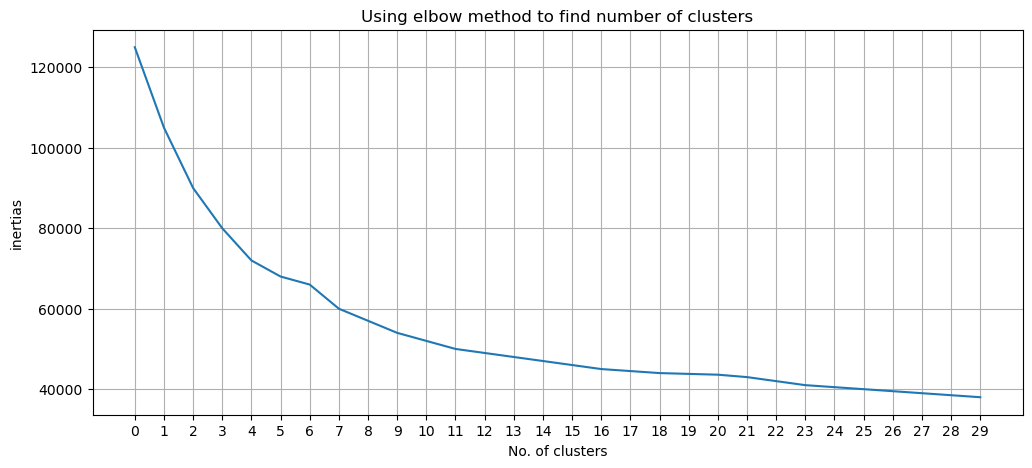

In [72]:
import matplotlib.pyplot as plt

n_inertias = [125000, 105000, 90000, 80000, 72000, 68000, 66000, 60000,
              57000, 54000, 52000, 50000, 49000, 48000, 47000, 46000,
              45000, 44500, 44000, 43800, 43600, 43000, 42000, 41000,
              40500, 40000, 39500, 39000, 38500, 38000]

num_clusters = len(n_inertias)

plt.figure(figsize=(12, 5))
plt.plot(n_inertias)
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.grid(True)
plt.show()

### Visualizing the Elbow Method and with Annotations
This code creates a plot to visualize the Elbow Method for determining the optimal number of clusters.

**Arrow Properties:** Define arrow properties (arrow_properties) for the annotation, including color, width, and style.

**Annotation:**
Annotate the plot to indicate the abrupt change (elbow point) at a cluster count of 7.

**Plot Inertia Values:**
Plot the inertia values (n_inertias.flatten()) against the number of clusters.


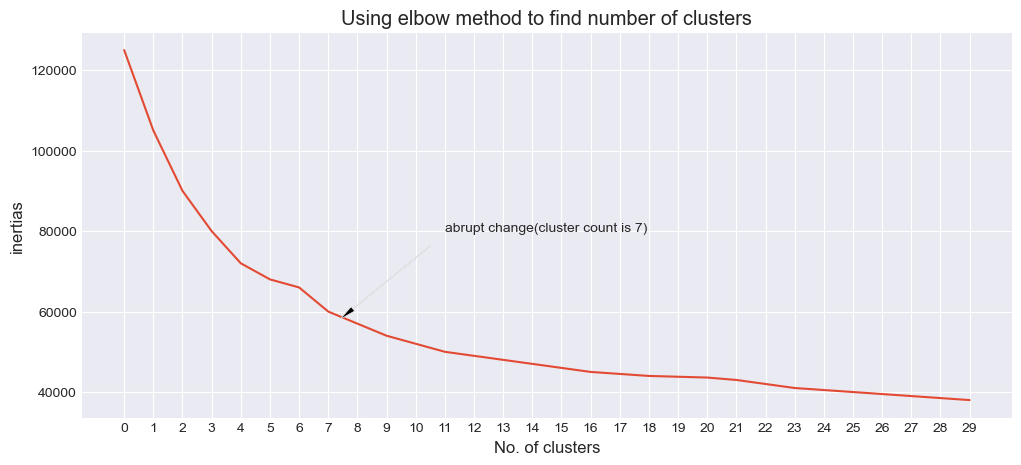

In [145]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(12, 5))

arrow_properties = dict(
    facecolor="black",
    width=0.5,
    headwidth=4,
    shrink=0.1
)

plt.annotate(
    "abrupt change(cluster count is 7)", 
    xy=(7, 55700),     # annotation point
    xytext=(11, 80000), # text location
    arrowprops=arrow_properties
)

# Plot inertia curve
plt.plot(n_inertias)  
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.show()

### Evaluating Clusters Using the Silhouette Score

The Silhouette Score is used to evaluate cluster quality and help determine the optimal number of clusters. For each cluster count from 2 to 29, a K-Means model is created and fitted to the standardized data, and cluster labels are predicted. The Silhouette Score, which measures how similar each point is to its own cluster compared to others, is then calculated using the Euclidean metric. Scores for each cluster count are stored in a list, allowing comparison—higher scores indicate more well-defined clusters. This method complements the Elbow Method by providing a quantitative measure of clustering performance.

In [78]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_standardized)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score (data_standardized, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

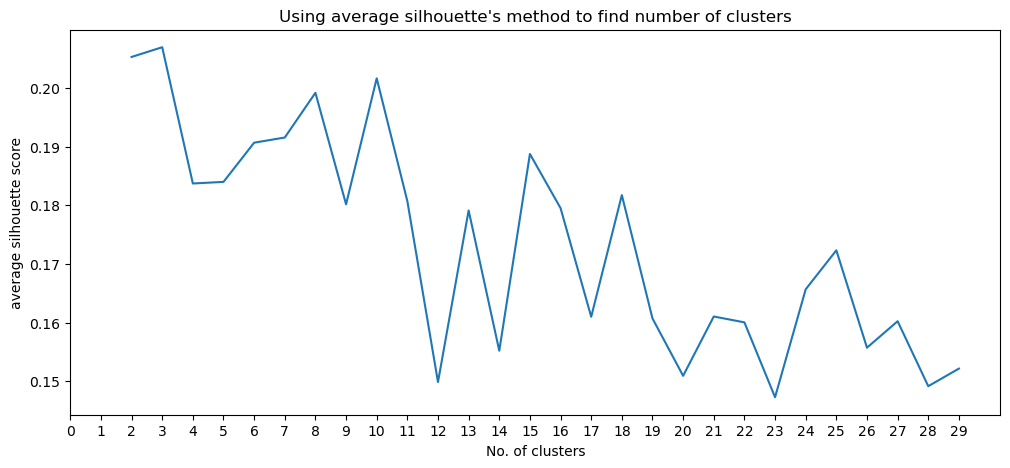

In [79]:
plt.figure(figsize = (12, 5))
plt.plot(num_clusters_list, silhouette_scores)
plt.xticks(range(0, 30, 1))
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.show()

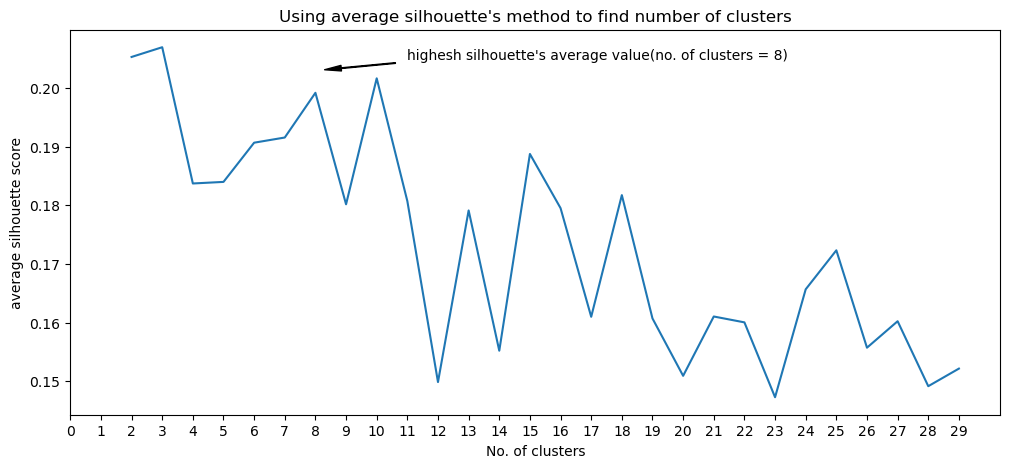

In [80]:
plt.figure(figsize = (12, 5))
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

plt.annotate(
    "highesh silhouette's average value(no. of clusters = 8)", xy=(8, 0.203),
    xytext=(11, 0.205),
    arrowprops=arrow_properties)
plt.plot(num_clusters_list, silhouette_scores)
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.xticks(range(0, 30, 1))
plt.show()

#### Visualizing Clusters using PCA

To visualize the clusters, Principal Component Analysis (PCA) is used to reduce the standardized data to two dimensions. A K-Means model with 7 clusters is fitted to the data, and cluster labels are assigned to each point. Plotting the data in this 2D PCA space allows for an intuitive view of cluster distribution and highlights the separation and characteristics of the different groups.

In [82]:
k_means_7 = KMeans(7)
k_means_7.fit(data_standardized)
k_means_7_labels = k_means_7.labels_

In [83]:
data_out_1 = pd.concat([data_outlier_free, pd.DataFrame({'clusters_kmeans7': k_means_7_labels})], axis = 1)

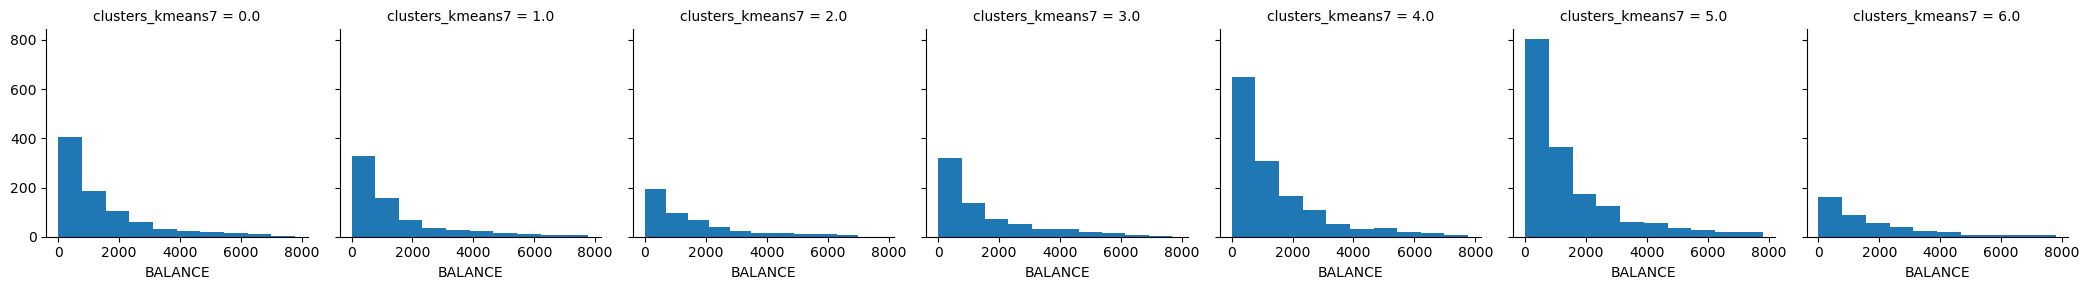

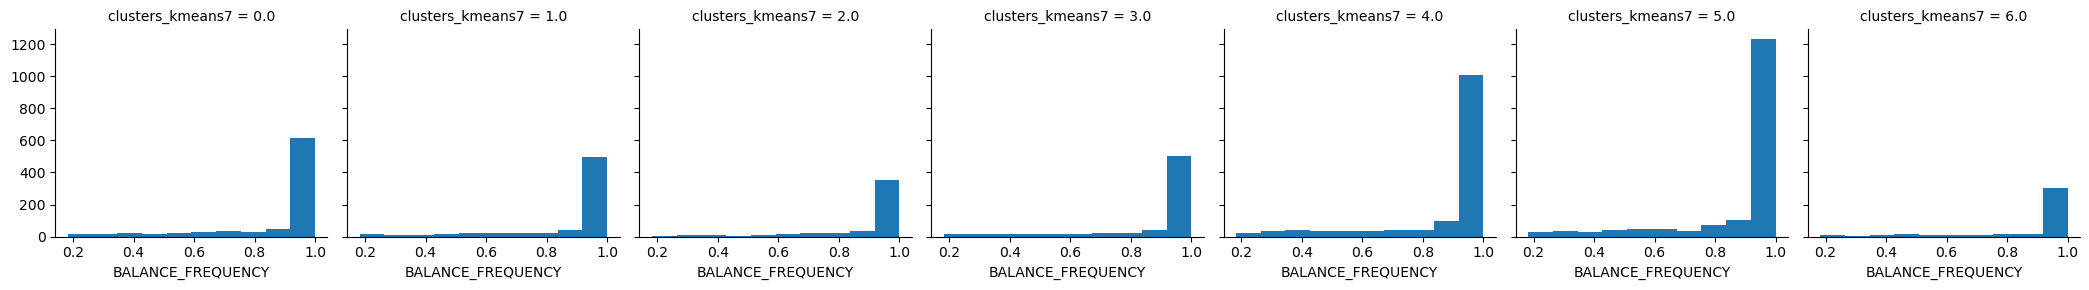

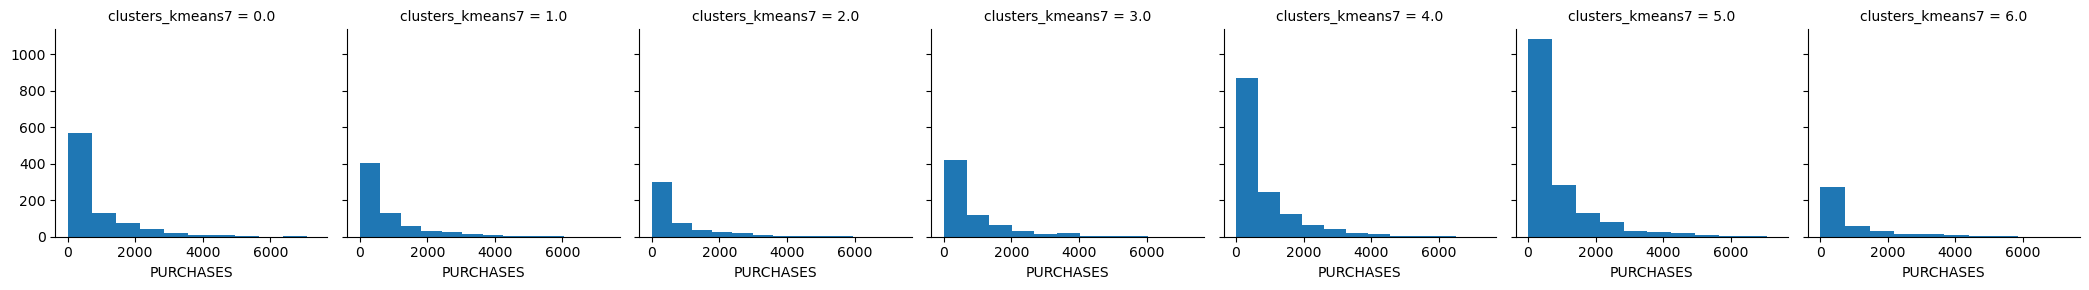

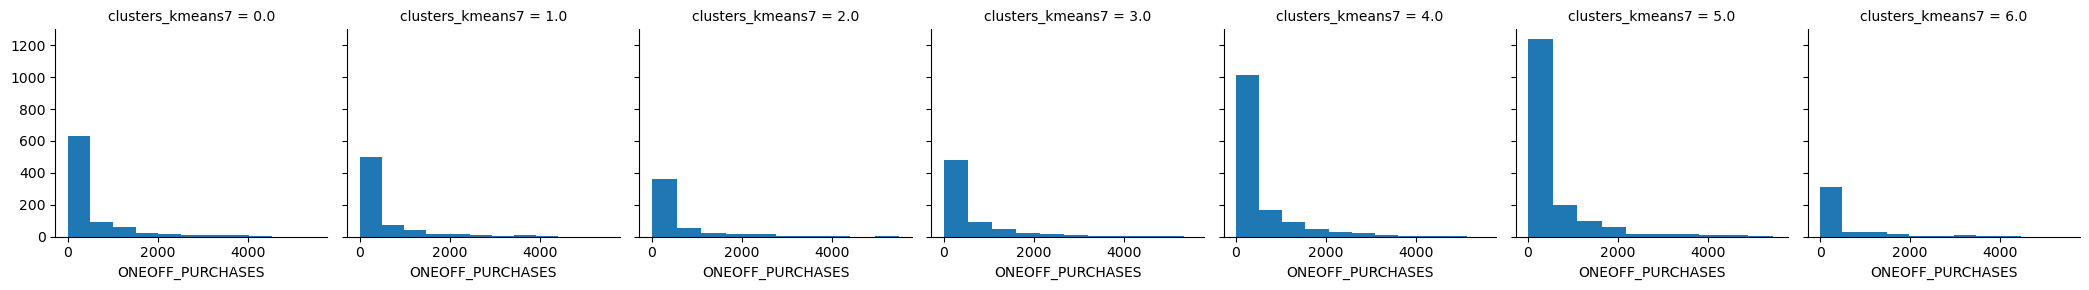

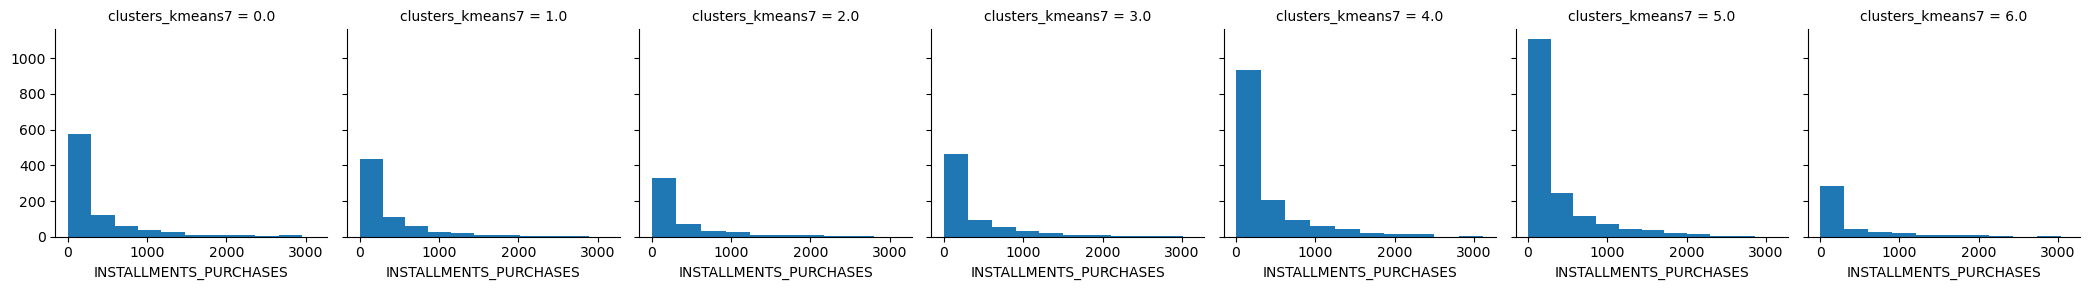

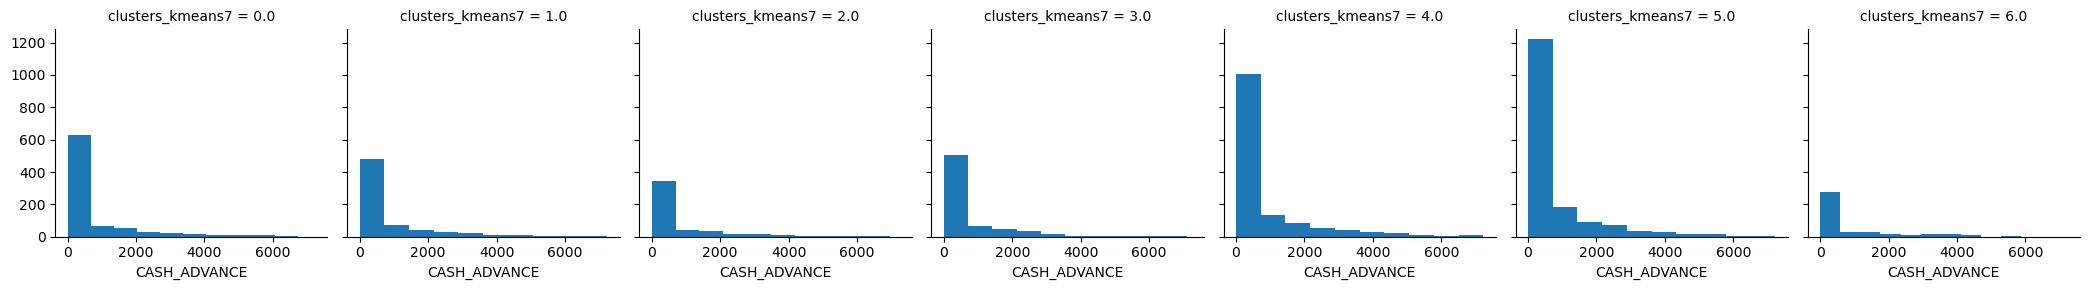

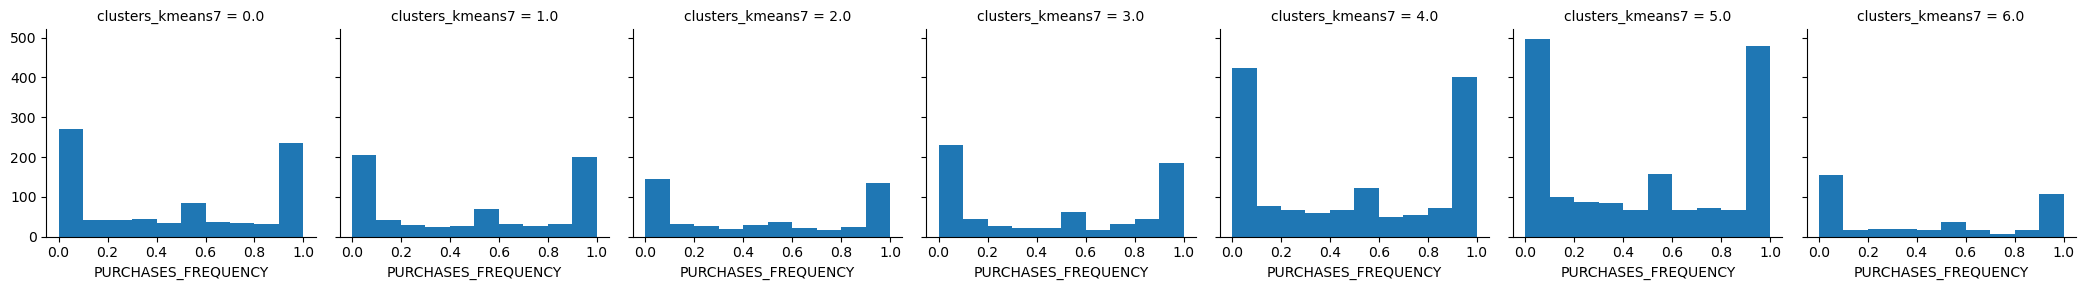

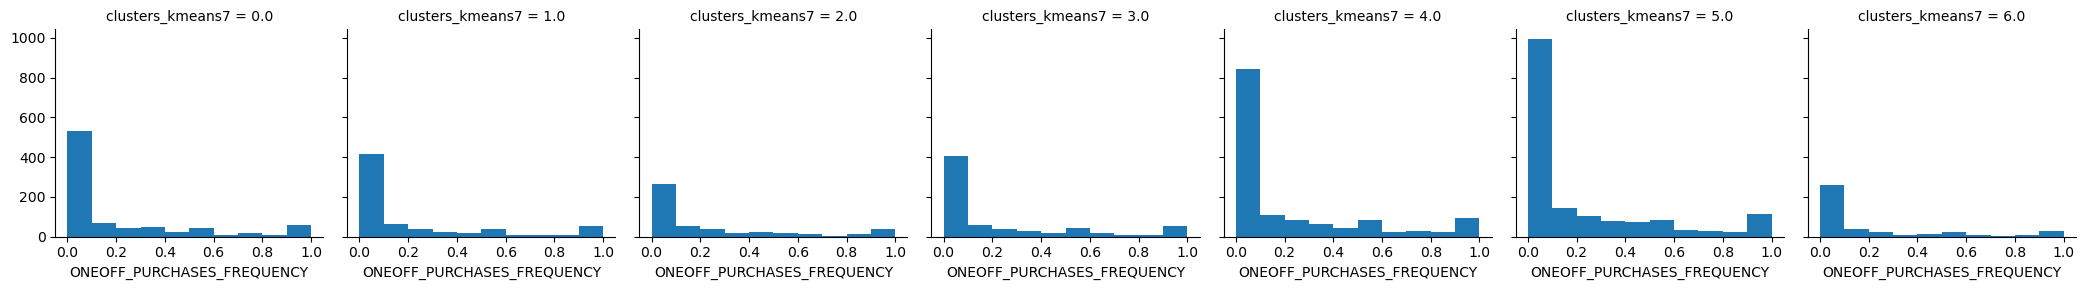

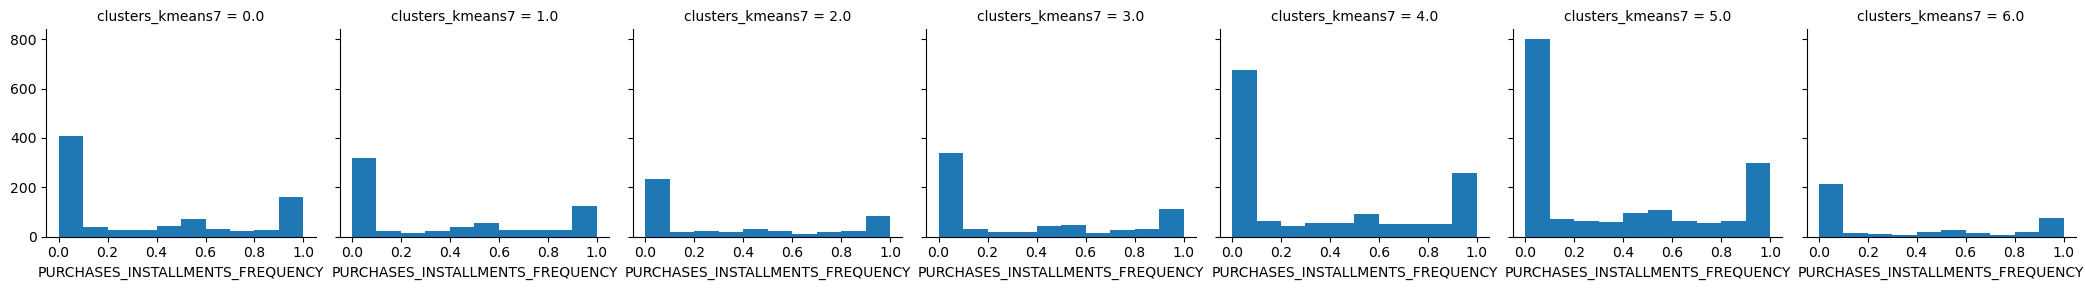

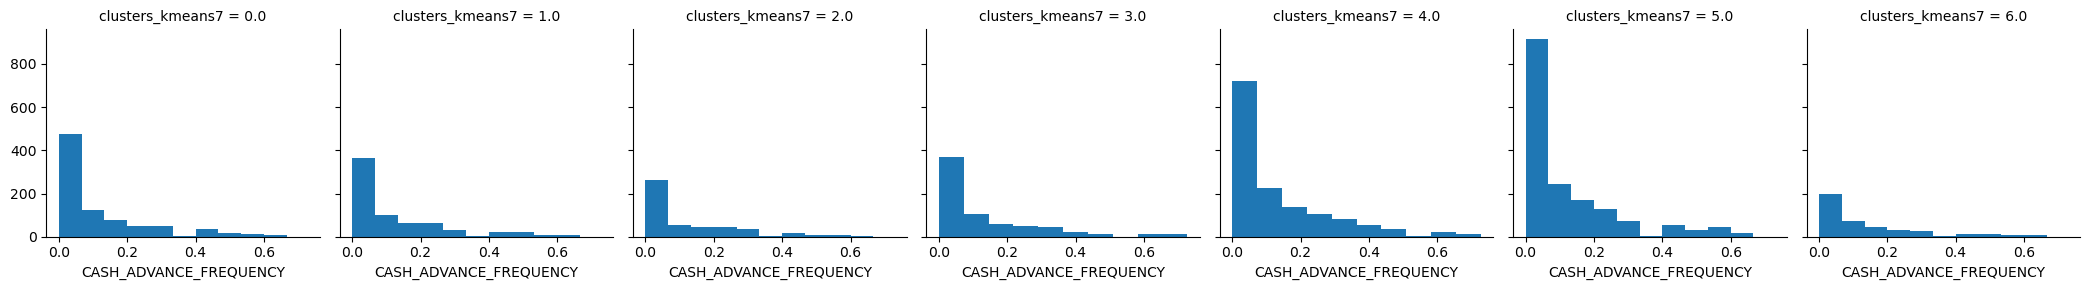

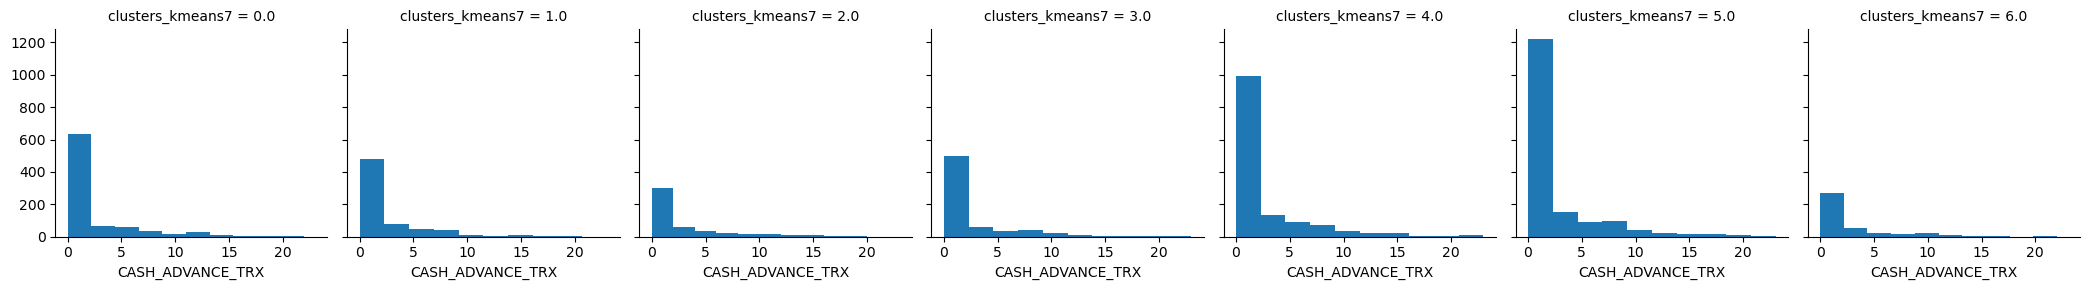

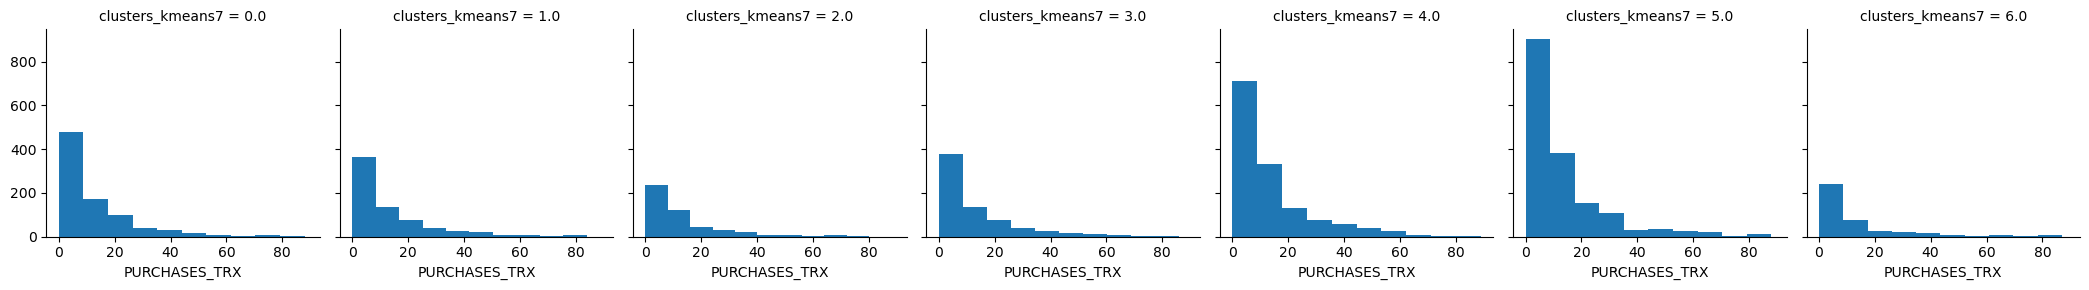

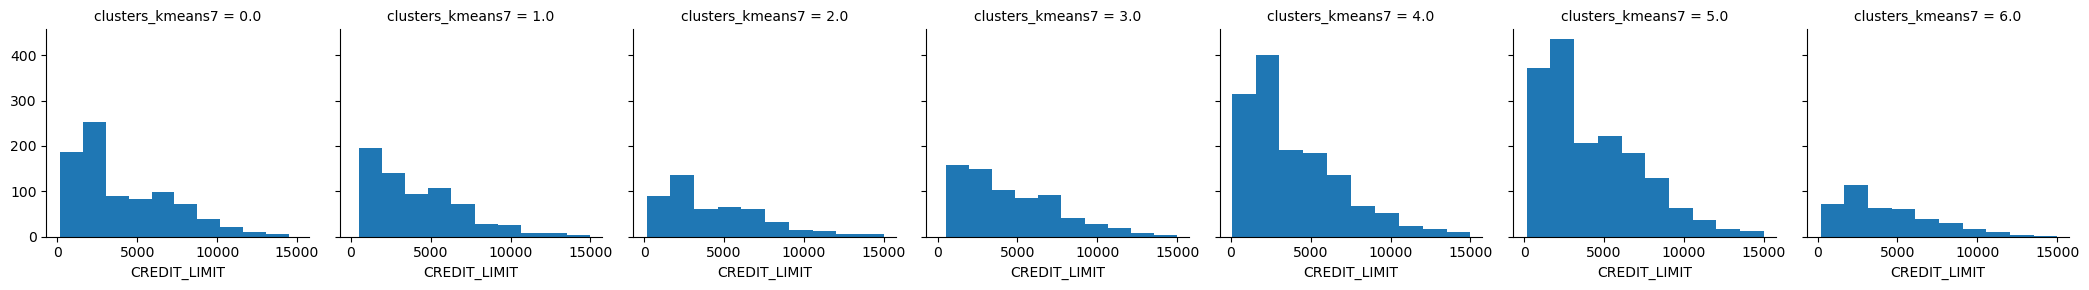

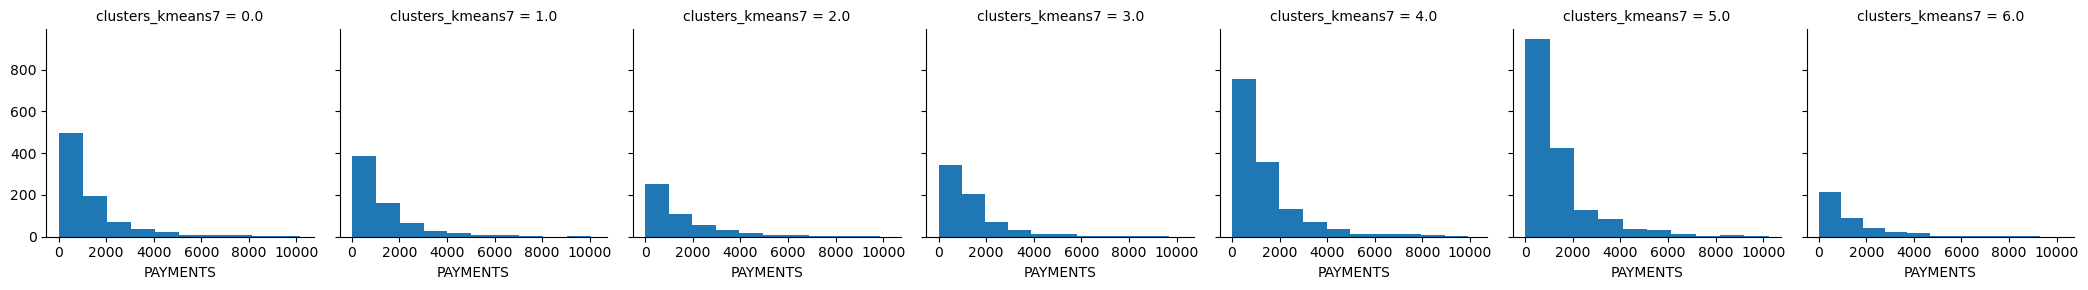

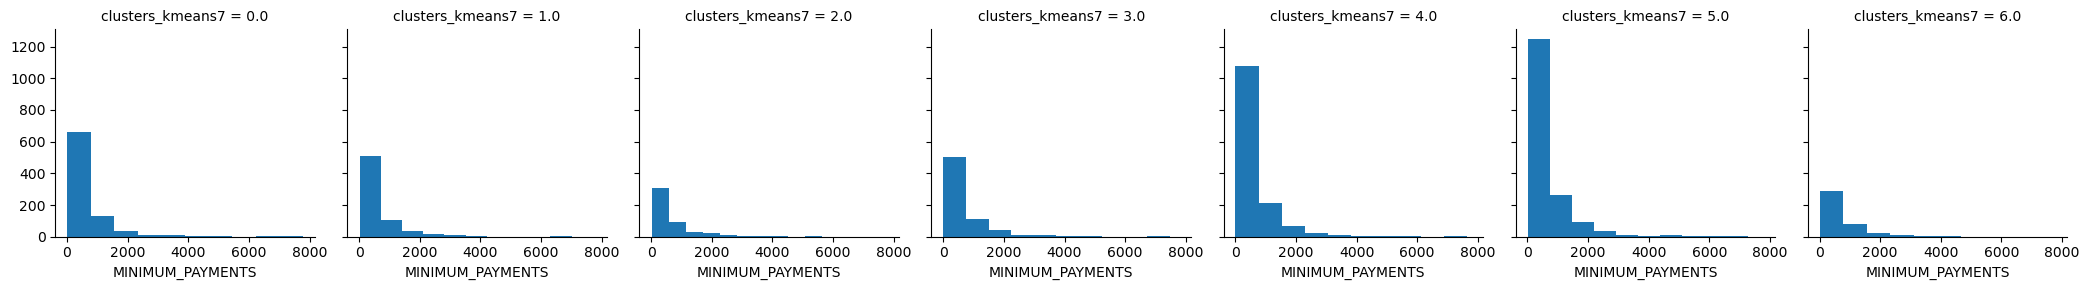

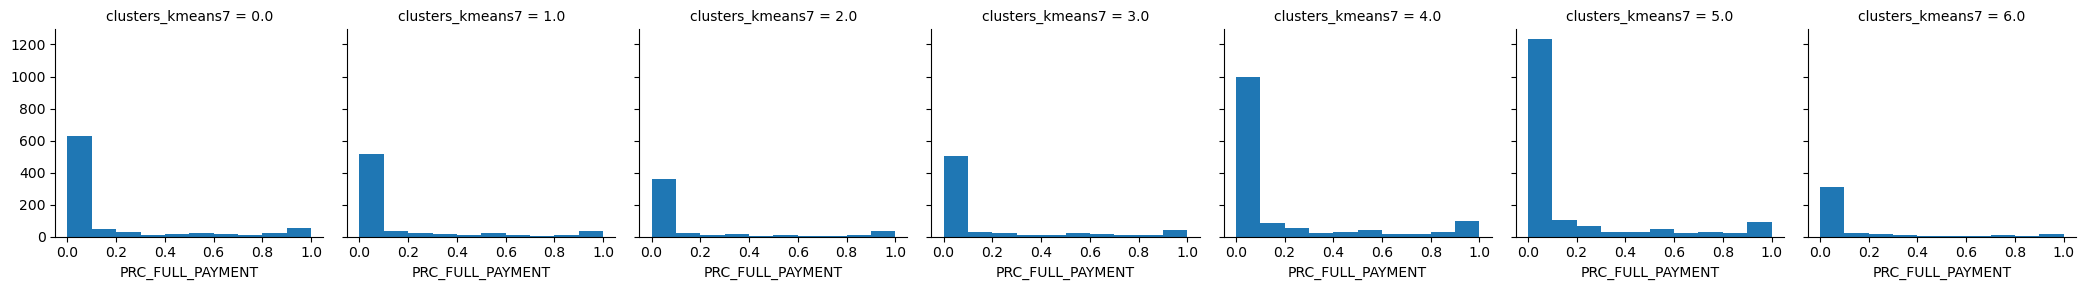

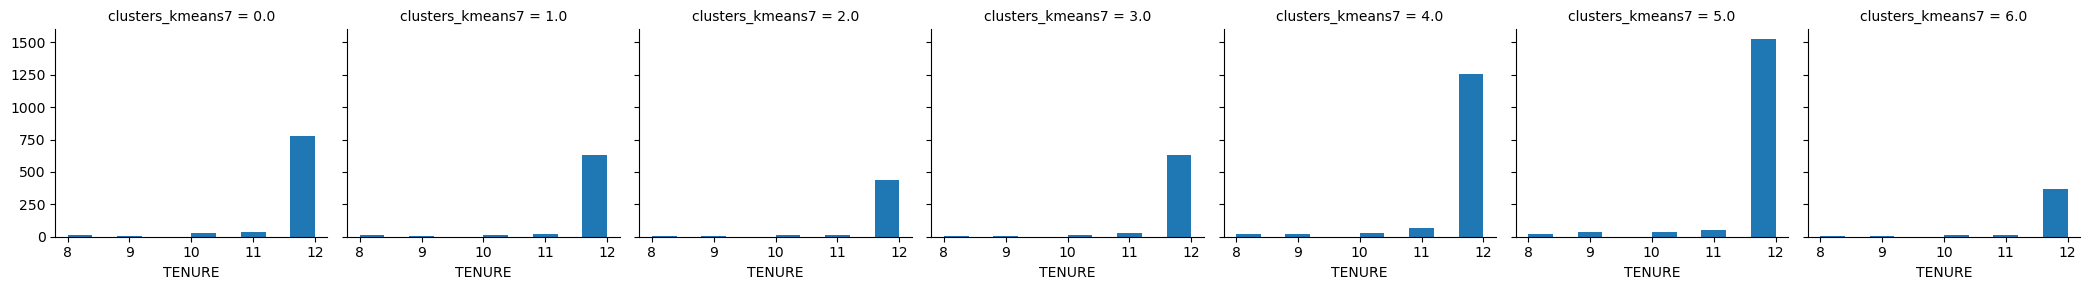

In [84]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_1, col = 'clusters_kmeans7')
    g.map(plt.hist, cols)

## Visualizing Customer Segments with PCA

Dimensionality Reduction: PCA reduces high-dimensional data into two principal components, simplifying the visualization of complex datasets.

Cluster Representation: K-Means clusters are plotted in the 2D PCA space, showing distinct groups based on customer behavior.

Customer Insights: Each cluster highlights different credit card usage patterns, such as spending habits, payment behavior, or transaction frequency.

Business Applications:

Targeted Marketing: Tailor promotions and campaigns for specific customer segments.

Risk Analysis: Identify high-risk or low-risk customers for better credit management.

Product Development: Design new financial products or features suited to each segment.

Interpretability: Makes it easier for stakeholders to understand customer segmentation visually, supporting data-driven decisions.

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

affinities = 1 - cosine_similarity(data_standardized)

pca = PCA(n_components=2)

pca.fit(affinities)

show_PCA = pca.transform(affinities)

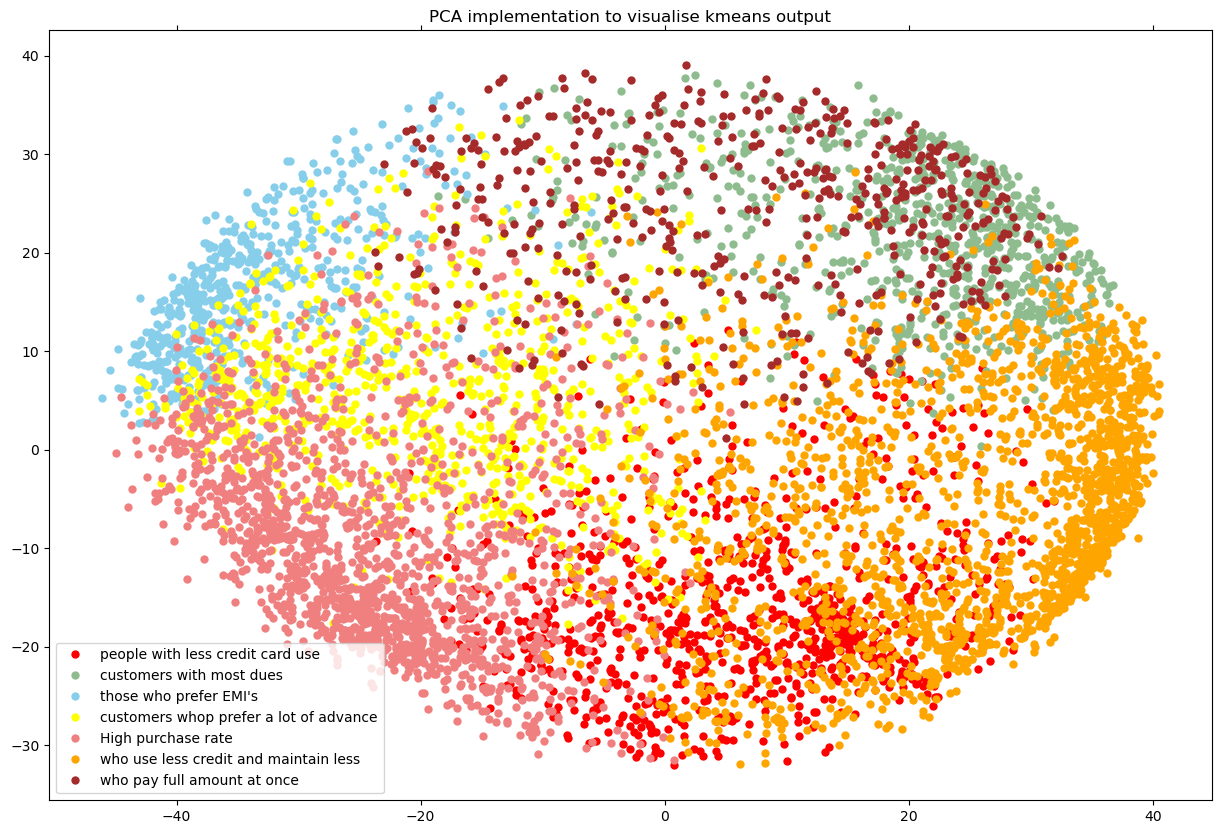

In [113]:
x, y = show_PCA[:, 0], see_PCA[:, 1]

colors = {0: 'red', 
          1: 'darkseagreen',
          2: 'skyblue', 
          3: 'yellow', 
          4: 'lightcoral',  
          5:'orange',
          6: 'brown'}

names = {0: 'people with less credit card use', 
         1: 'customers with most dues', 
         2: 'those who prefer EMI\'s', 
         3: 'customers whop prefer a lot of advance', 
         4: 'High purchase rate',
         5: 'who use less credit and maintain less',
         6: 'who pay full amount at once'}
  
df = pd.DataFrame({'x': x, 'y':y, 'labels':k_means_7_labels}) 
groups = df.groupby('labels')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("PCA implementation to visualise kmeans output")
plt.show()

In [127]:
k_means_8 = KMeans(8)
k_means_8.fit(data_standardized)
k_means_8_labels = k_means_8.labels_

In [128]:
data_out_2 = pd.concat([data_out_1, pd.DataFrame({'clusters_kmeans8': k_means_8_labels})], axis = 1)

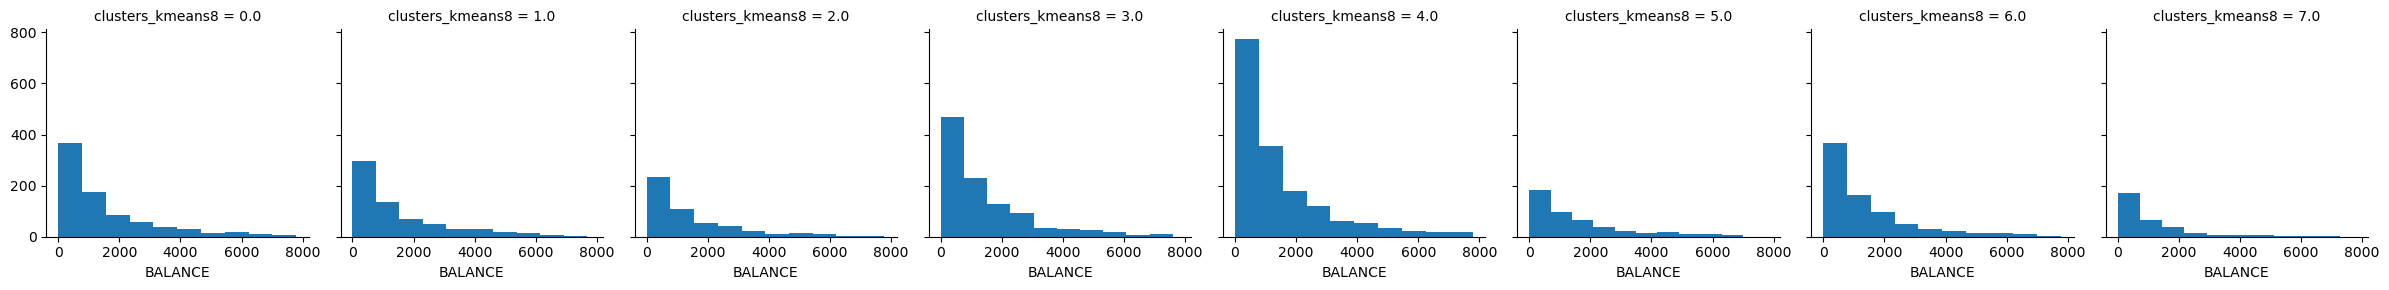

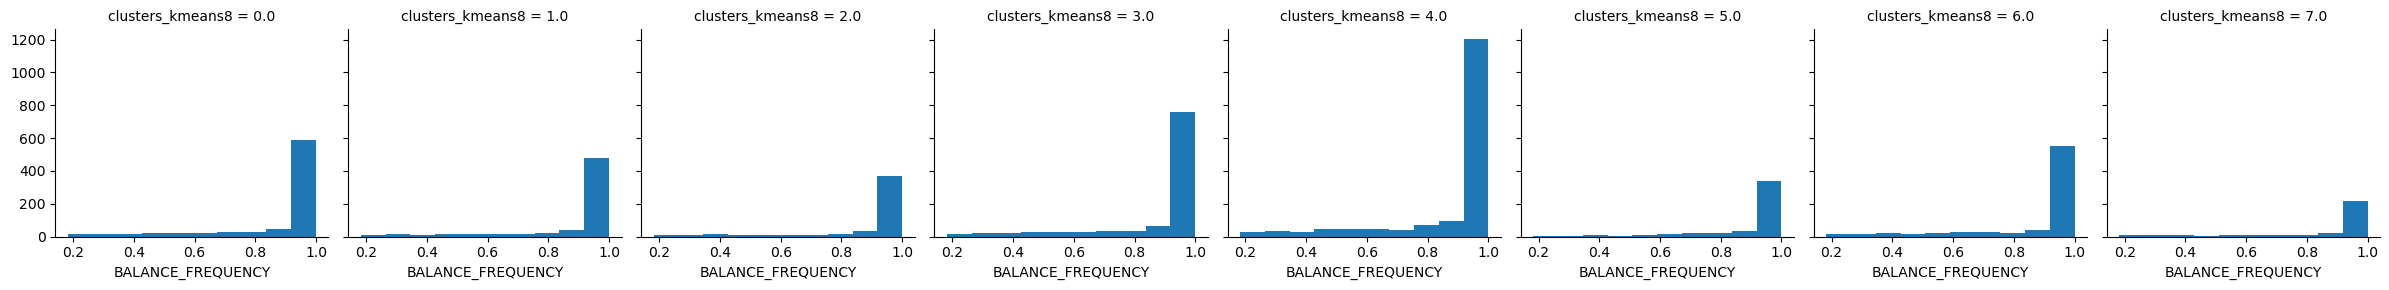

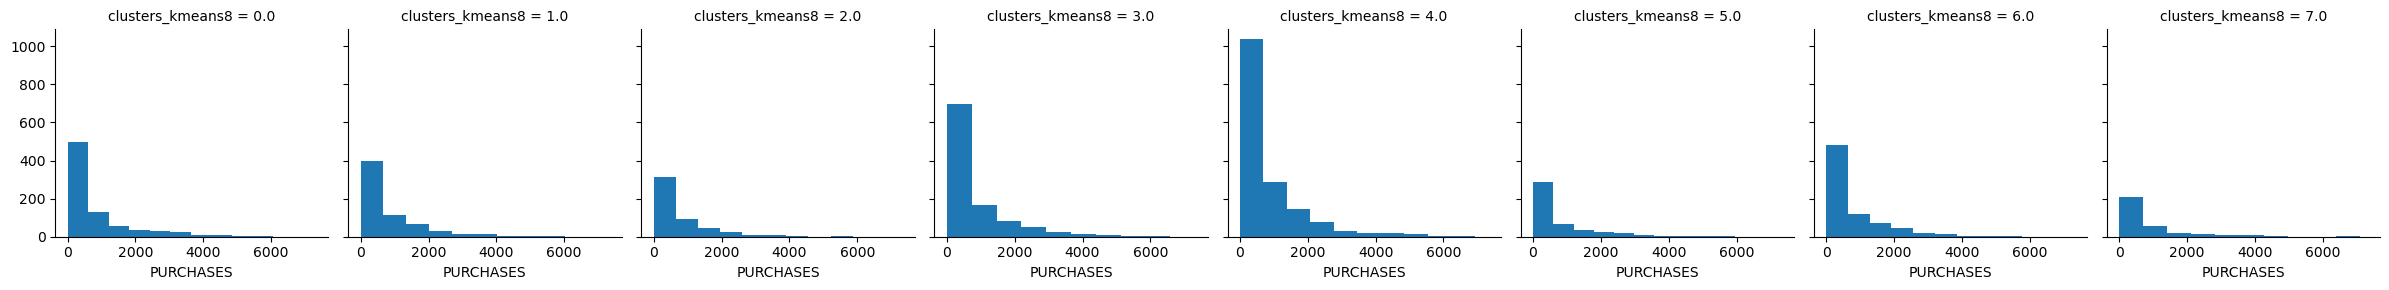

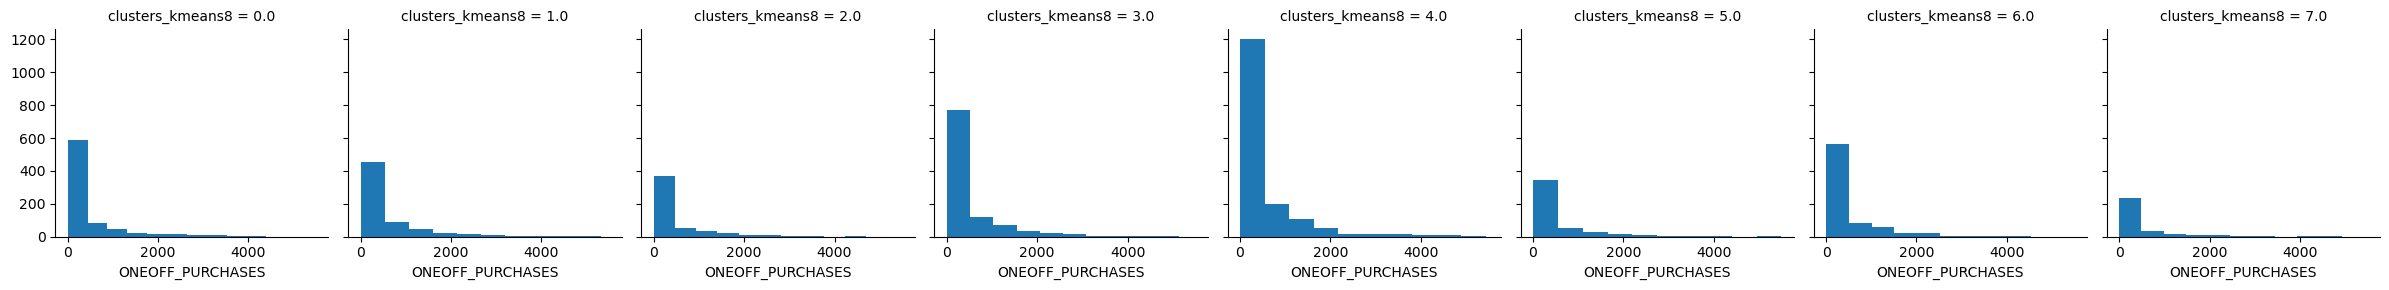

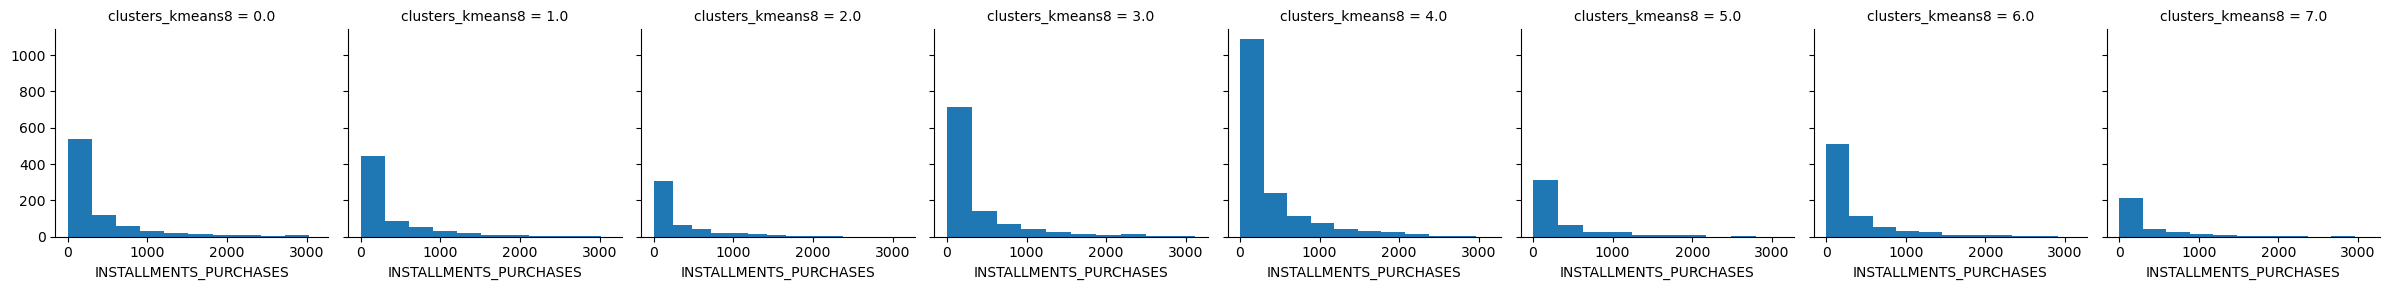

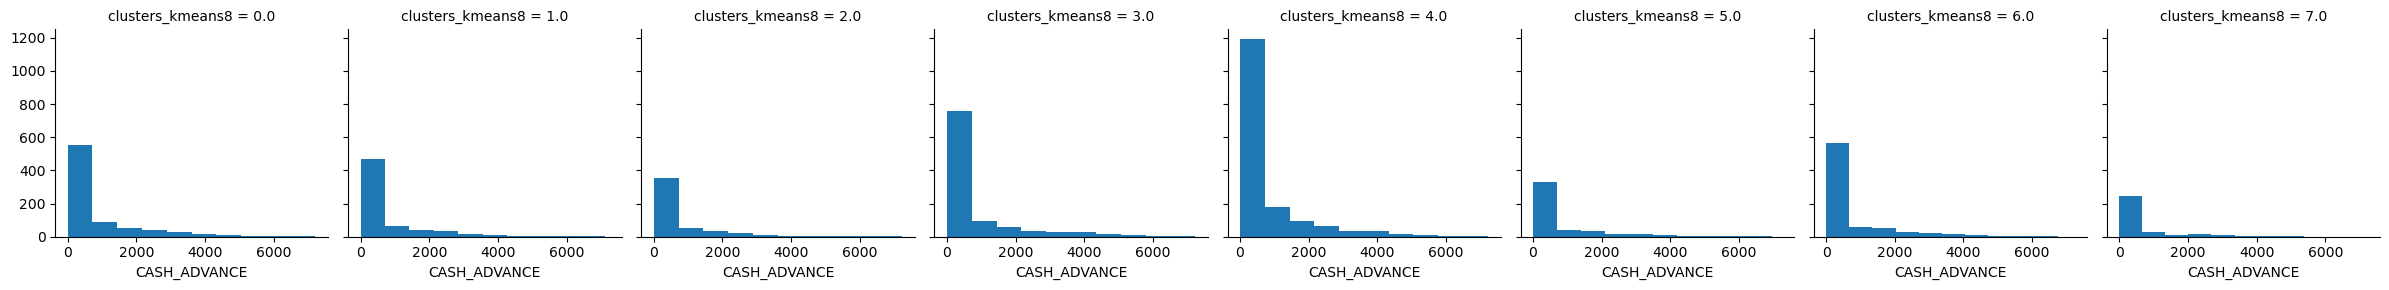

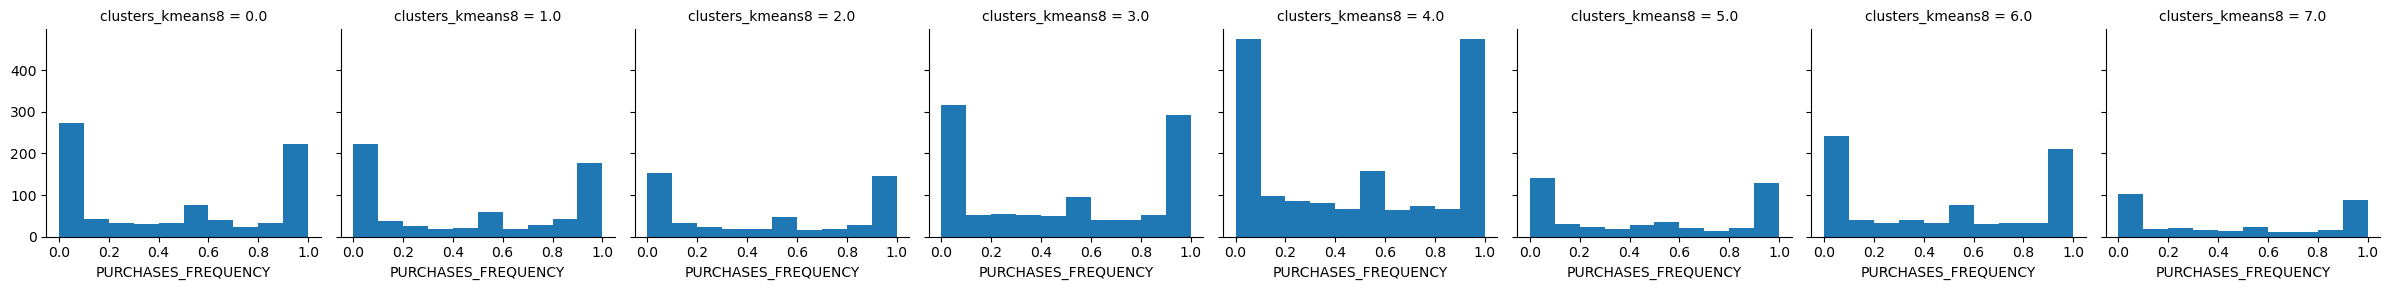

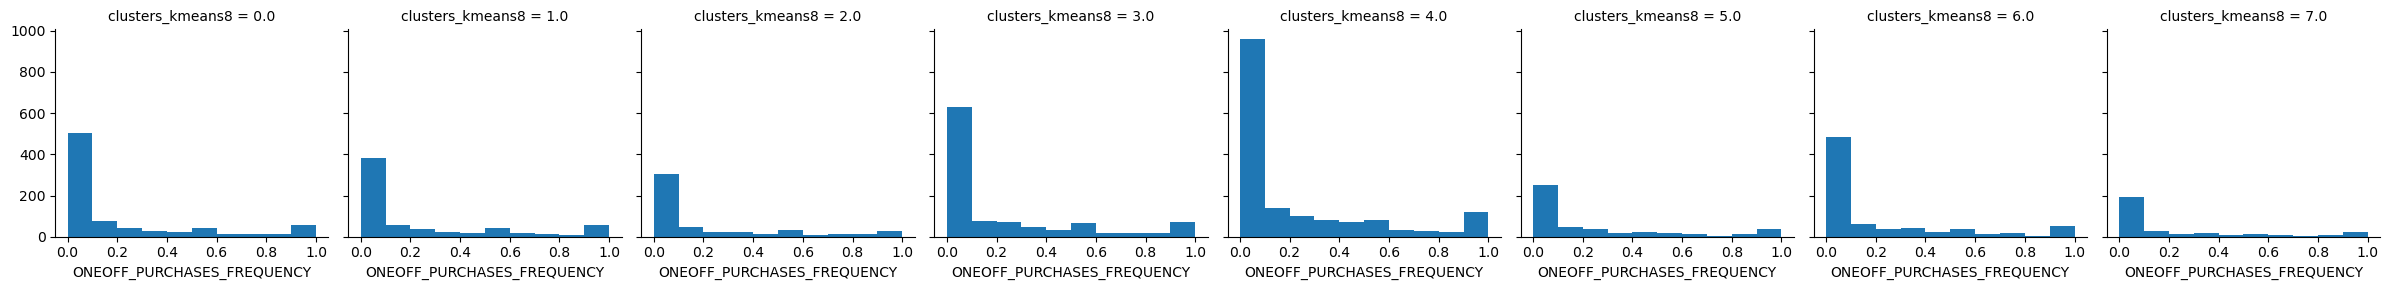

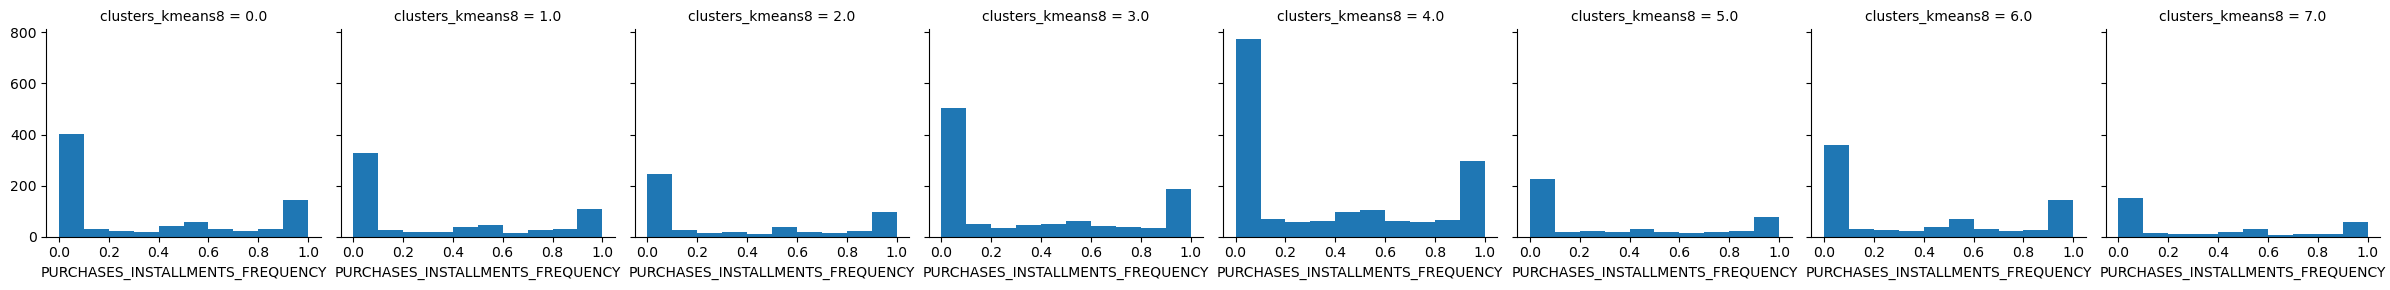

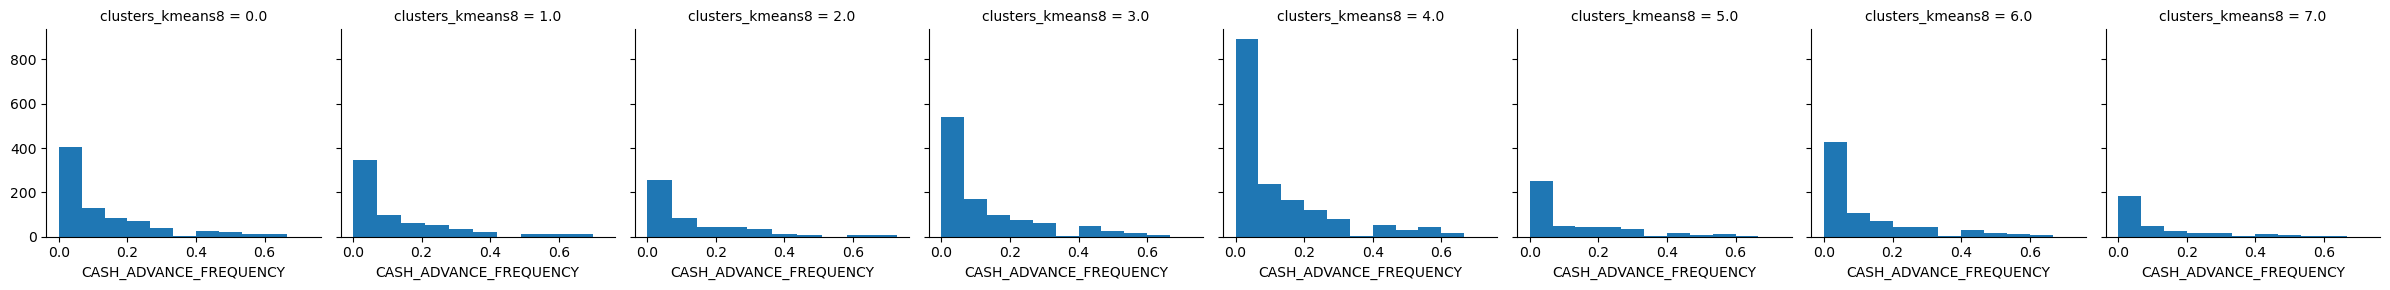

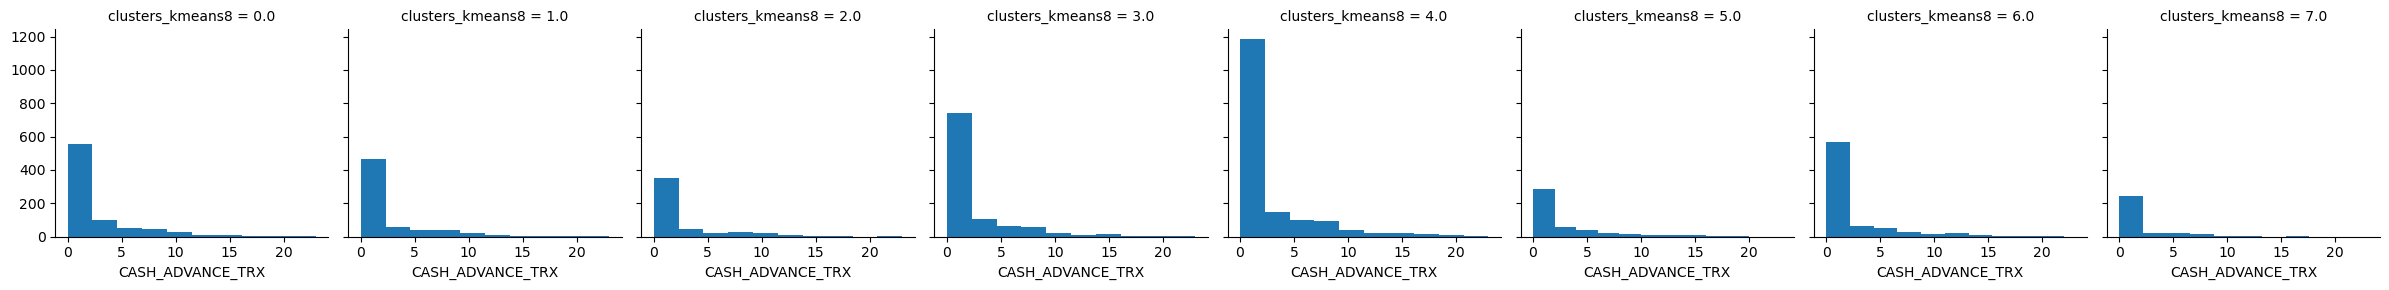

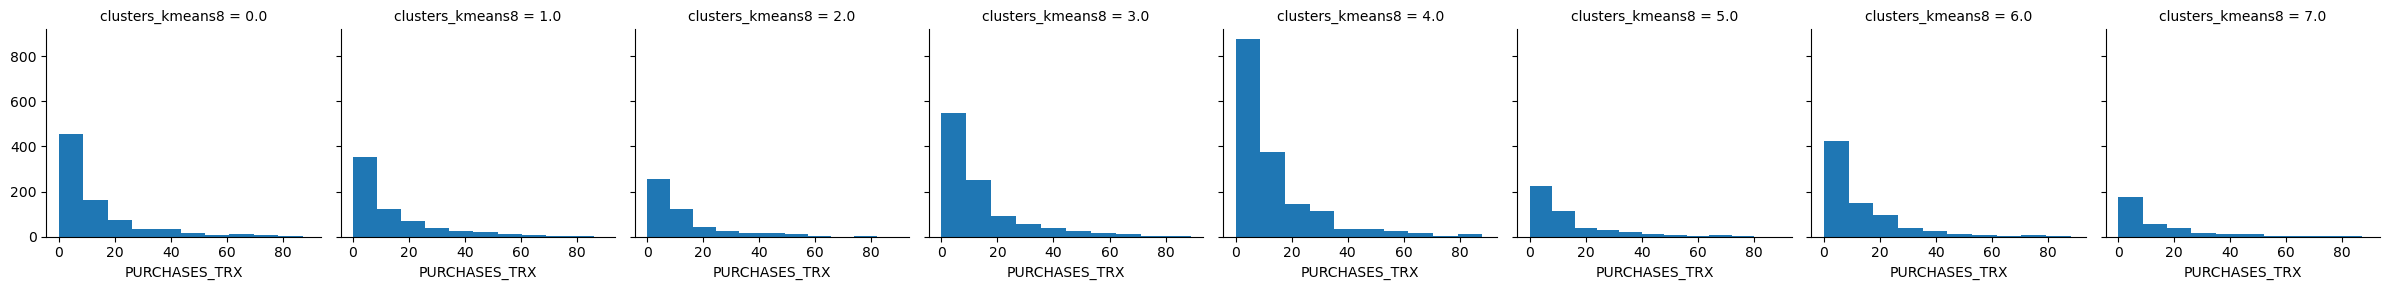

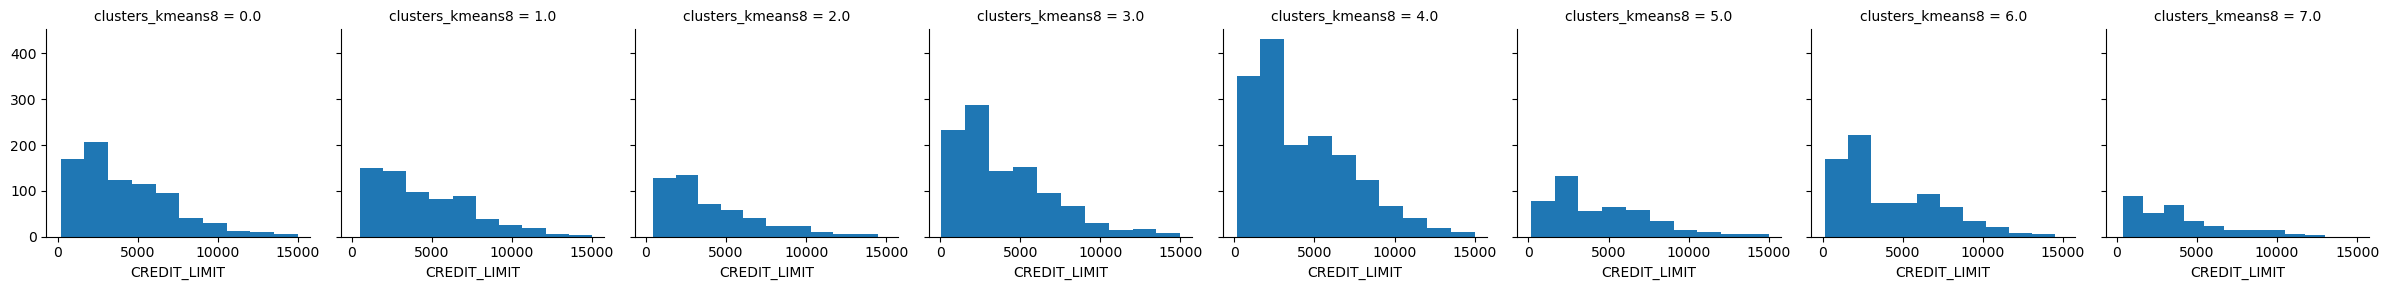

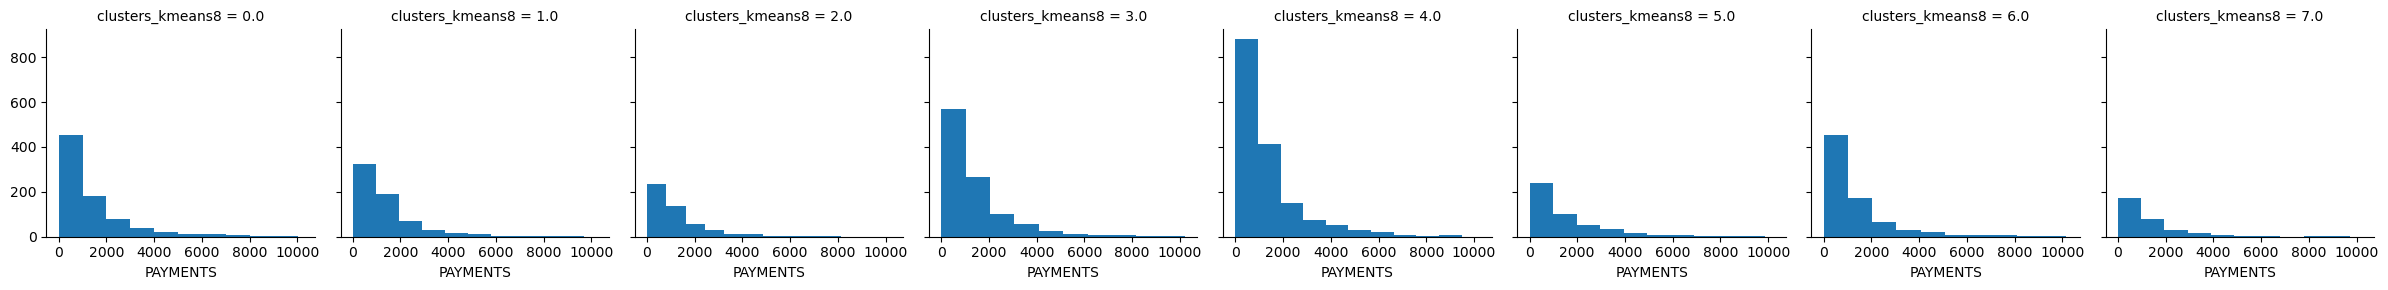

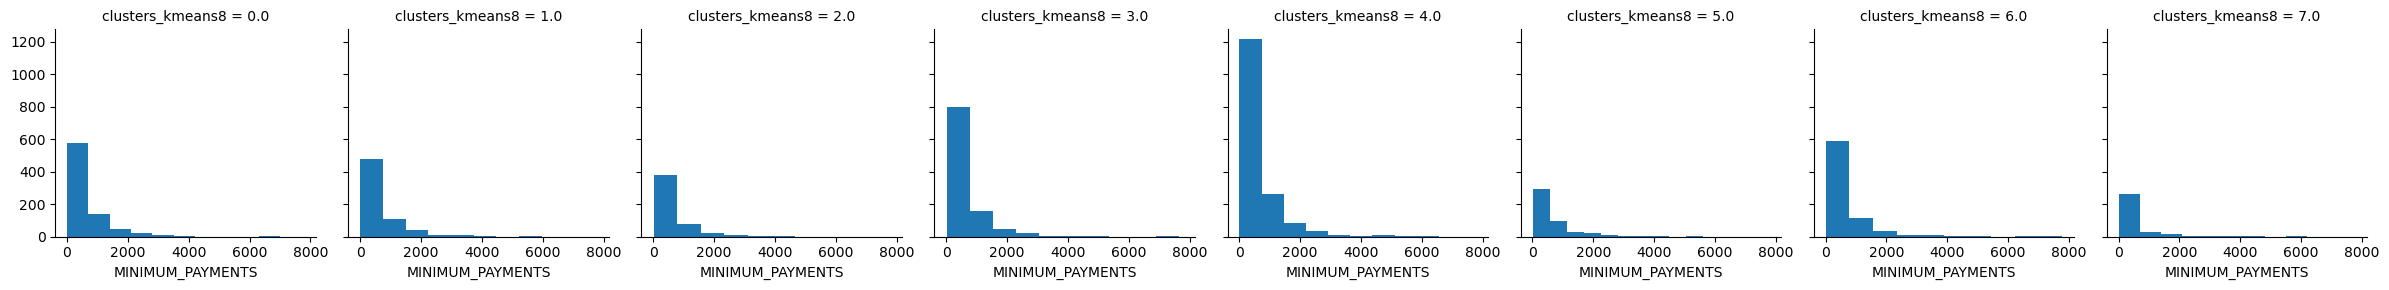

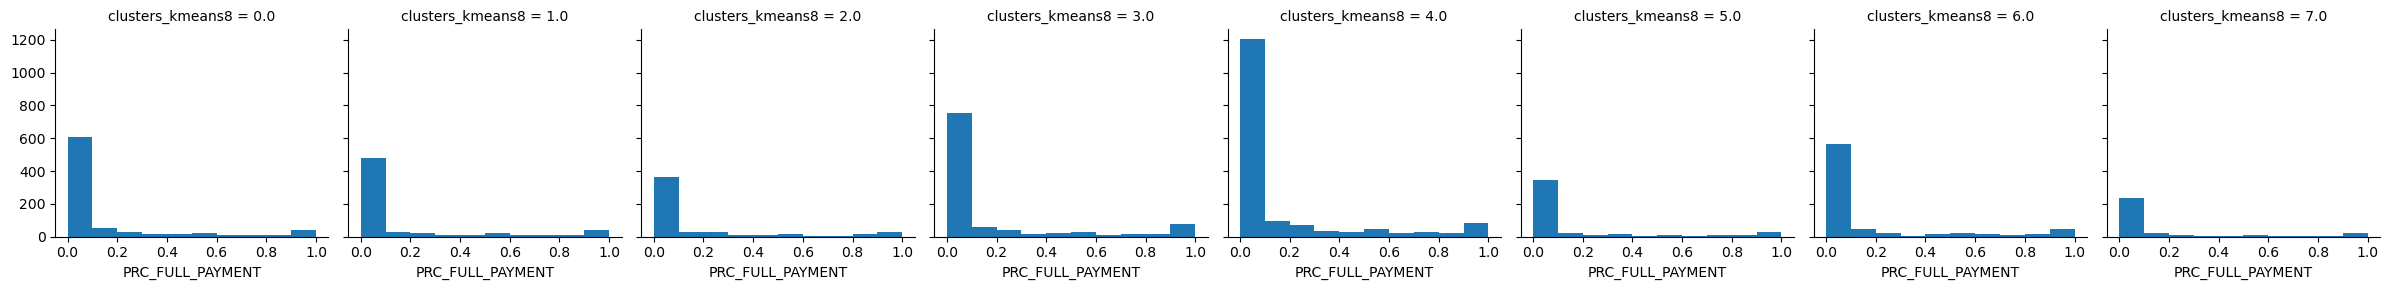

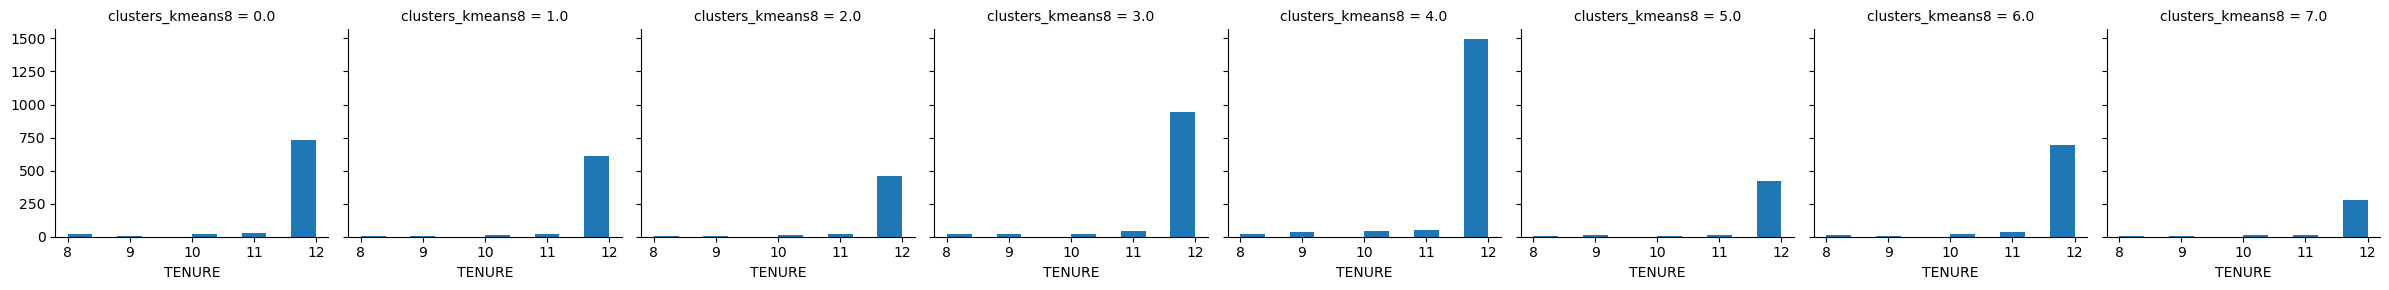

In [129]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_2, col = 'clusters_kmeans8')
    g.map(plt.hist, cols)

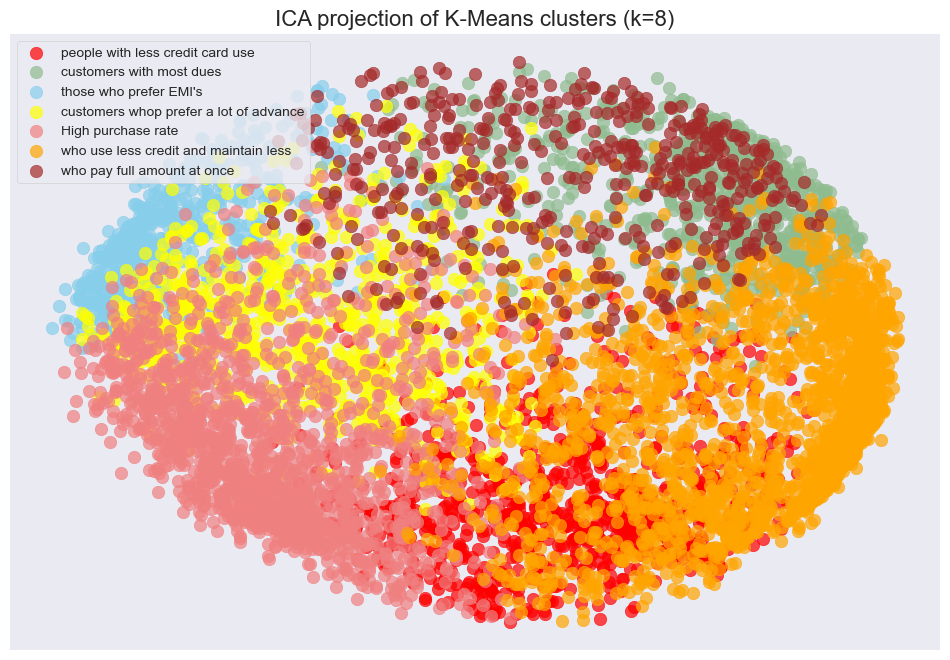

In [132]:
fig, ax = plt.subplots(figsize=(12, 8))

for name, group in groups:
    ax.scatter(group.x, group.y,
               s=80,
               alpha=0.7,
               color=colors[name],
               label=names[name])

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("ICA projection of K-Means clusters (k=8)", fontsize=16)
ax.legend(frameon=True)
plt.show()

In [133]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(7)
agglomerative_clustering.fit(data_standardized)
agglomerative_clustering_labels = agglomerative_clustering.labels_

In [135]:
data_out_3 = pd.concat([data_out_2, pd.DataFrame({'agglomerative_clustering': agglomerative_clustering_labels})], axis = 1)

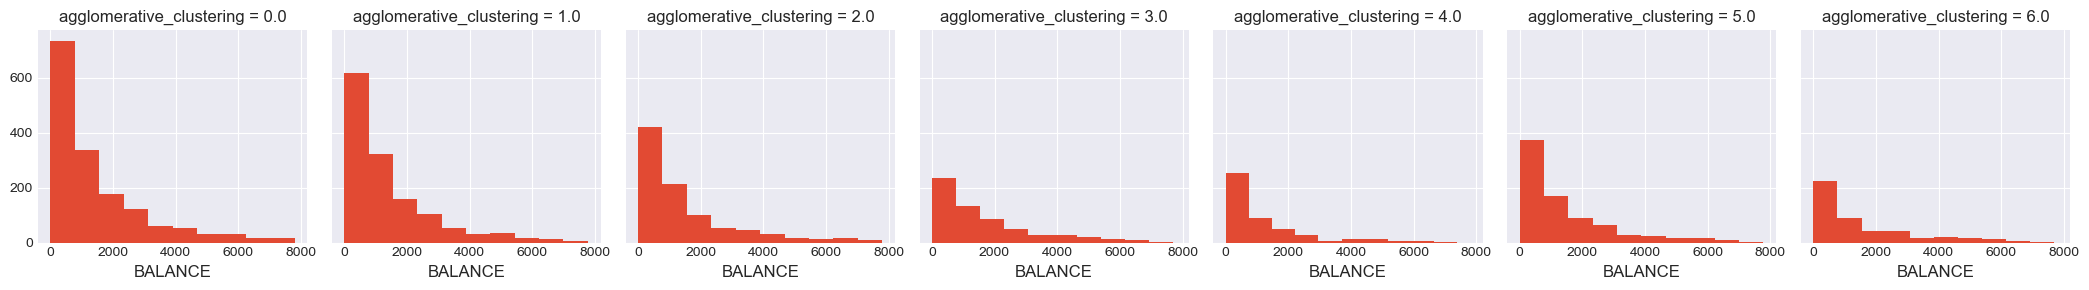

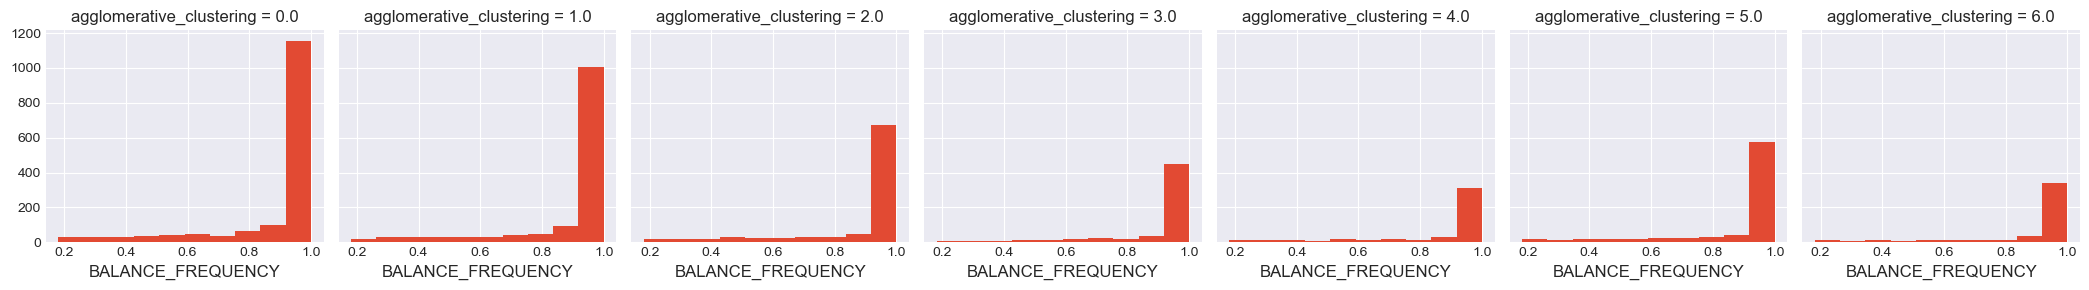

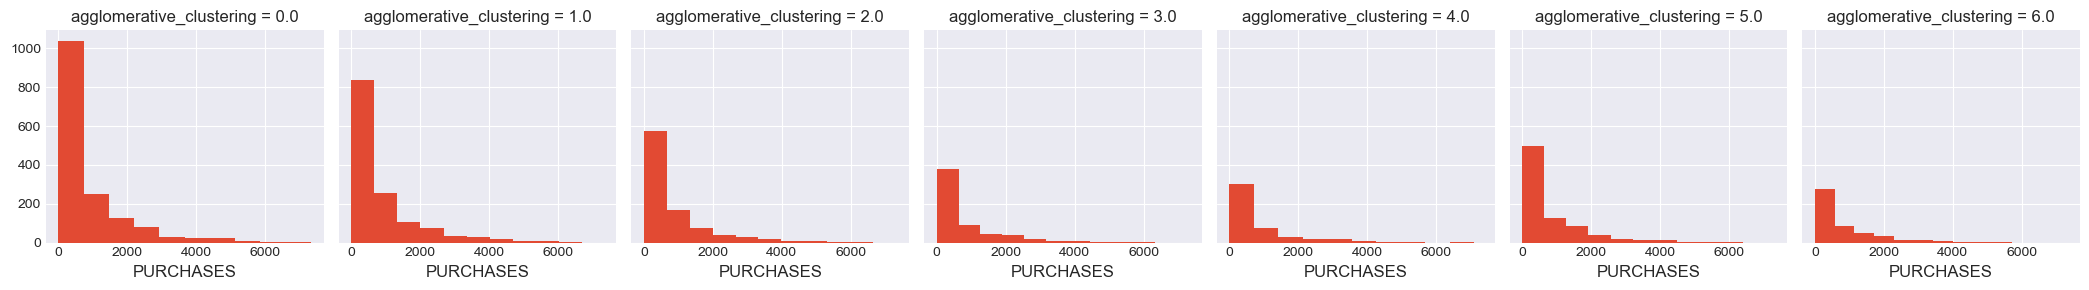

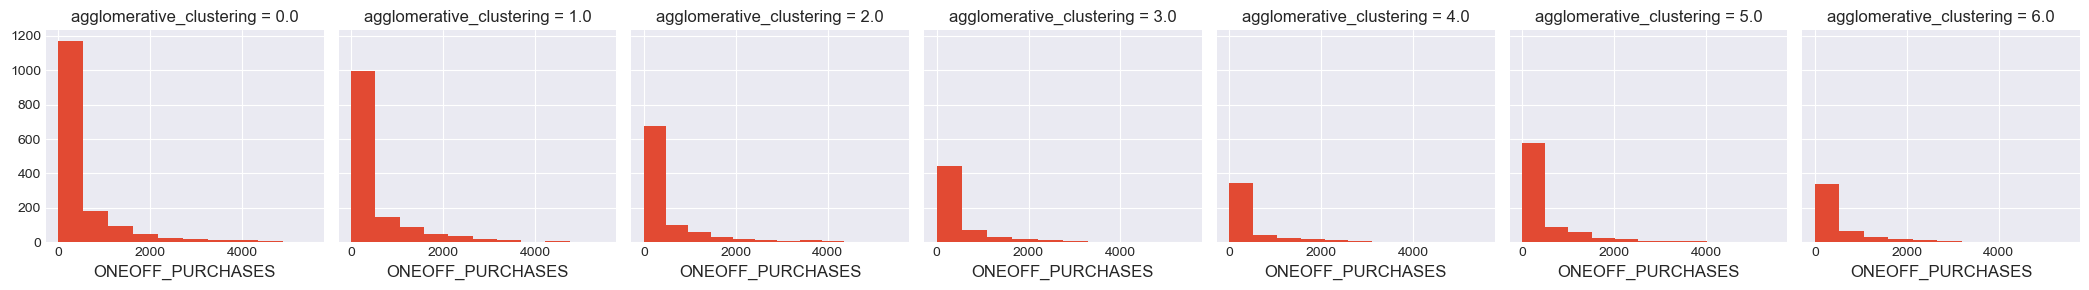

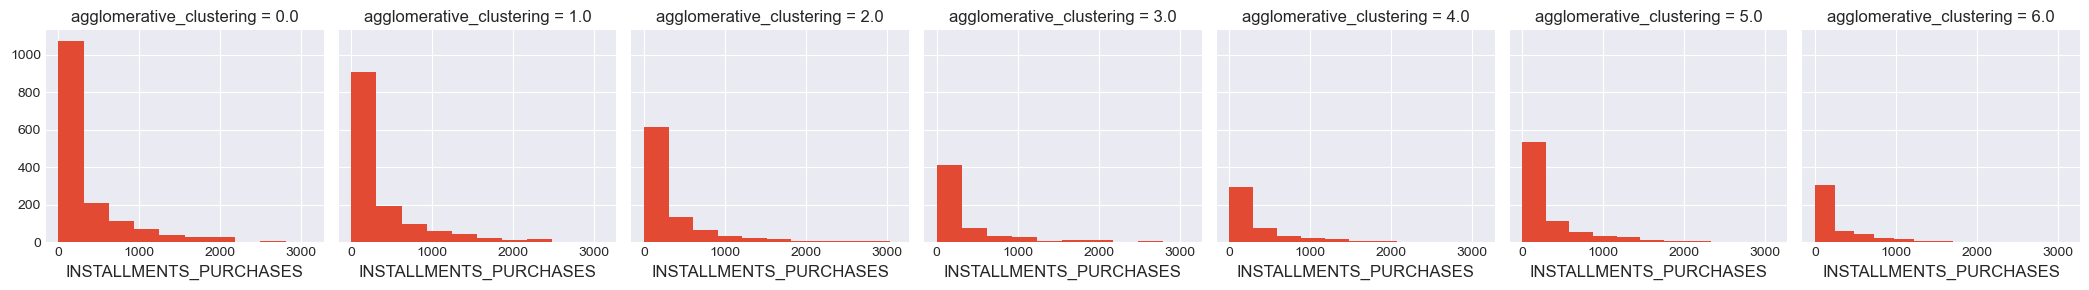

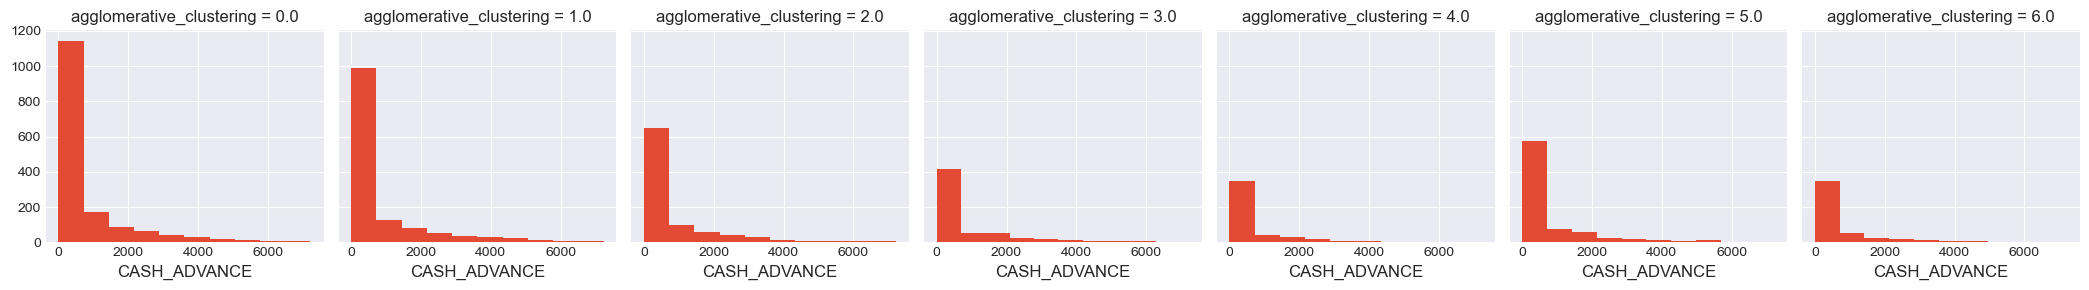

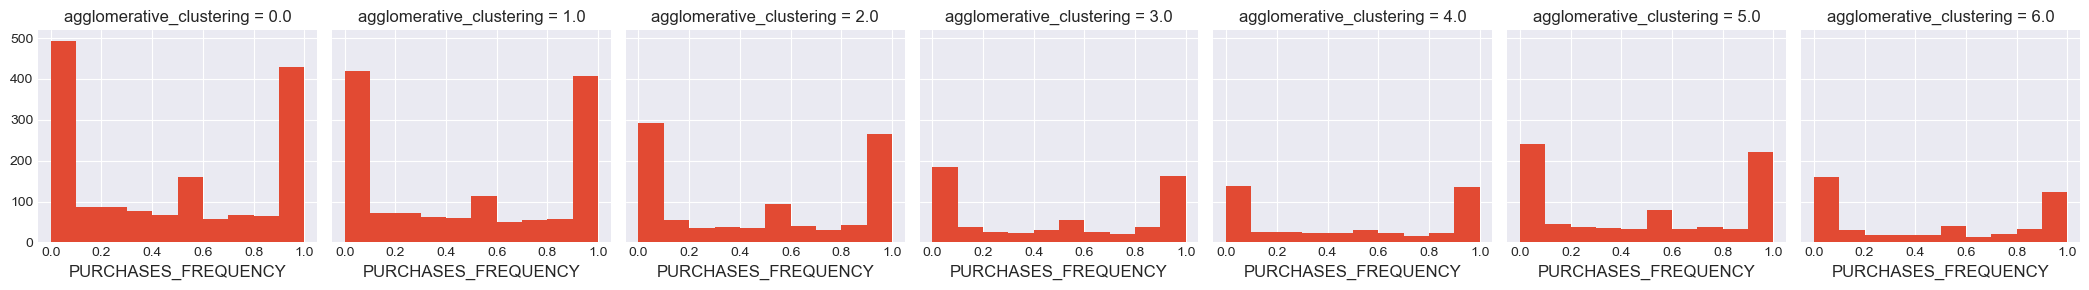

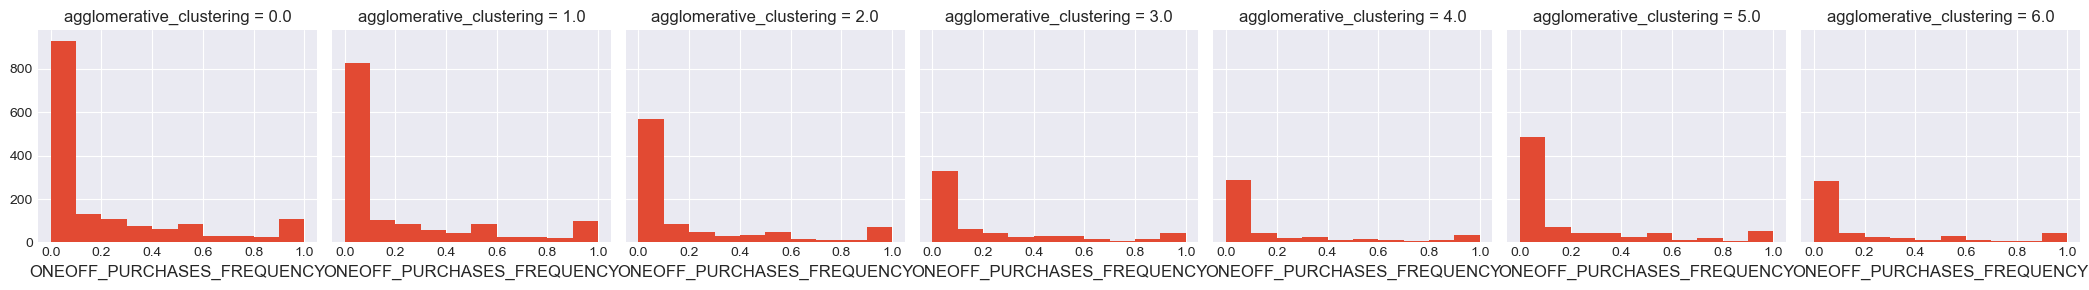

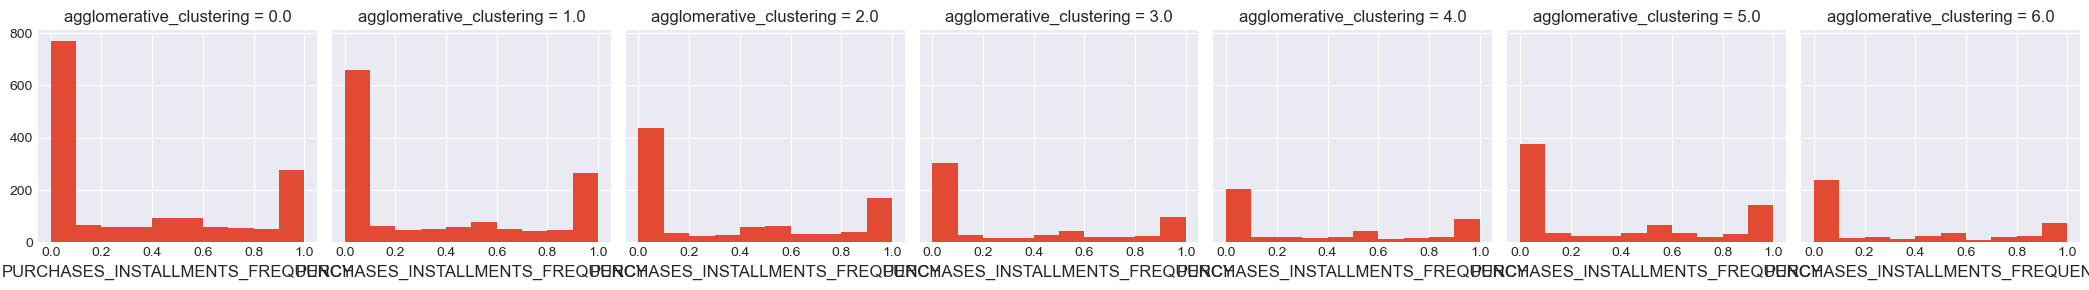

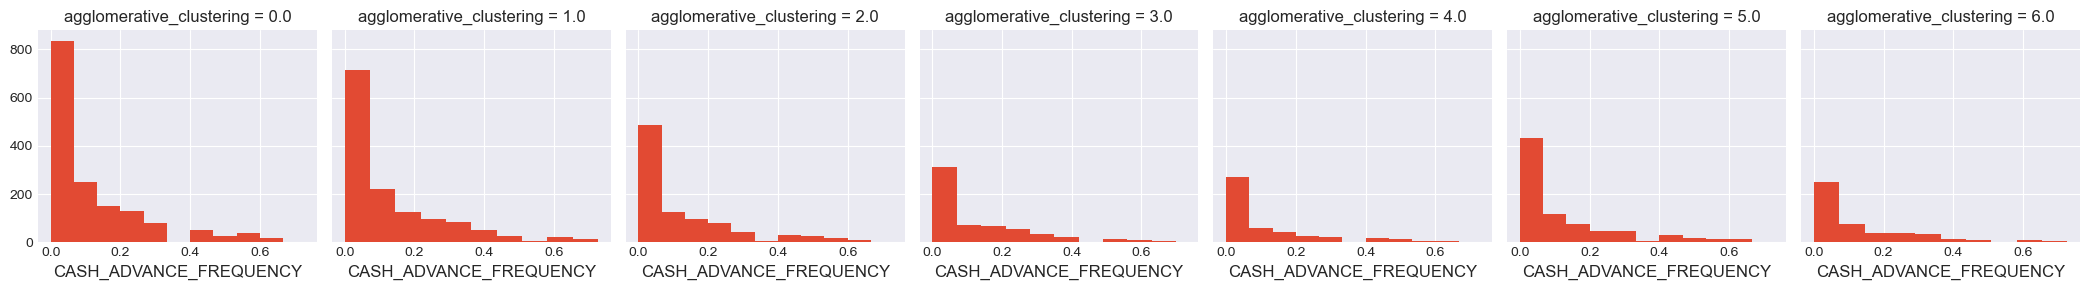

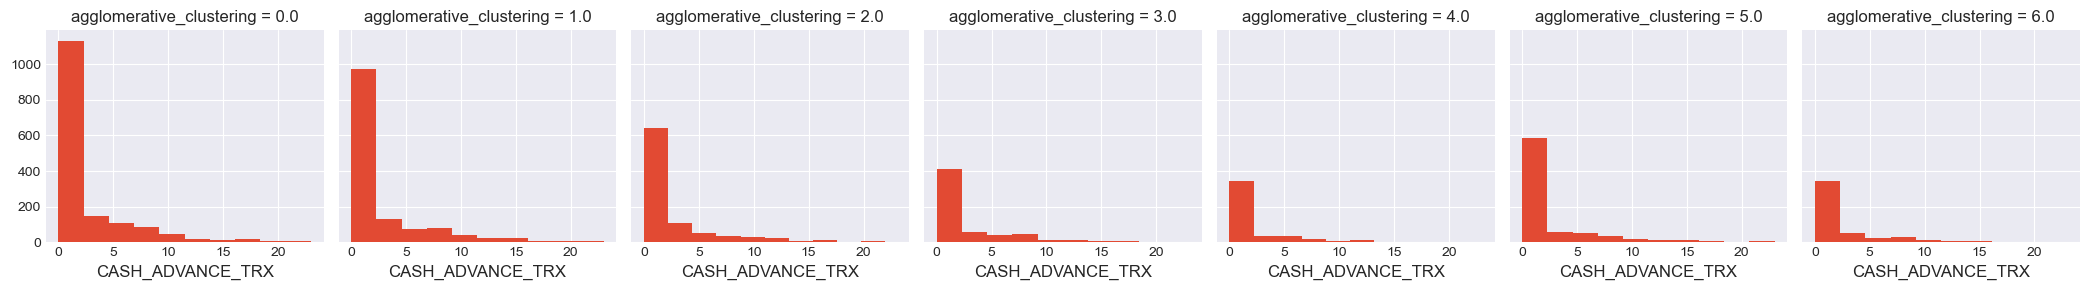

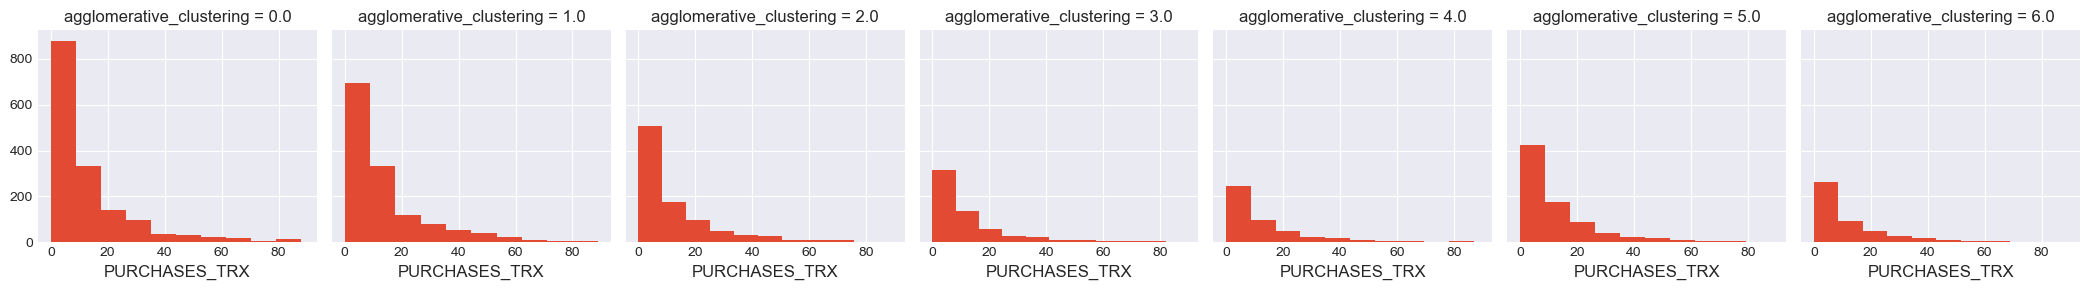

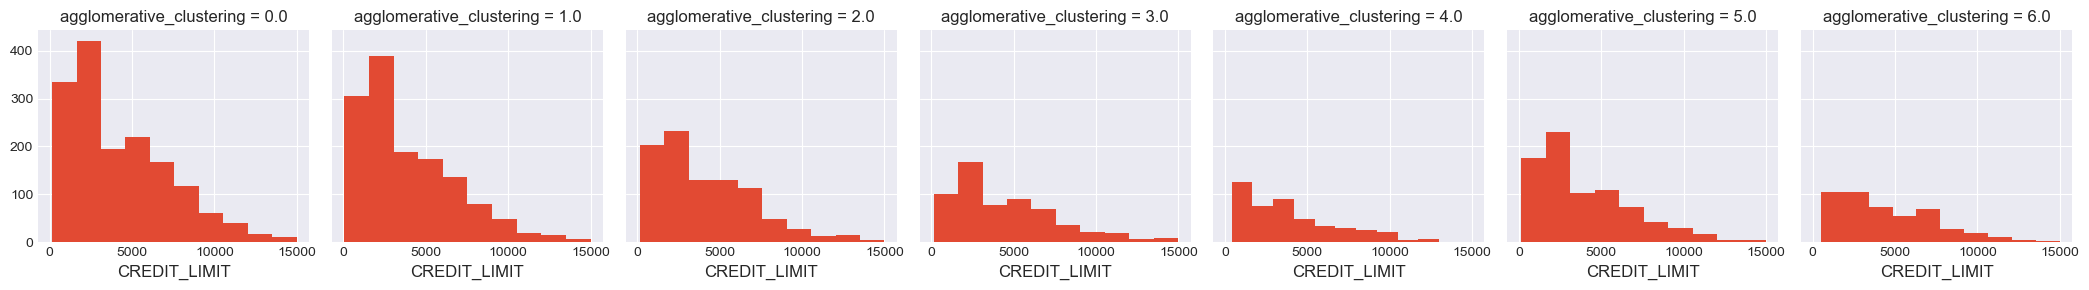

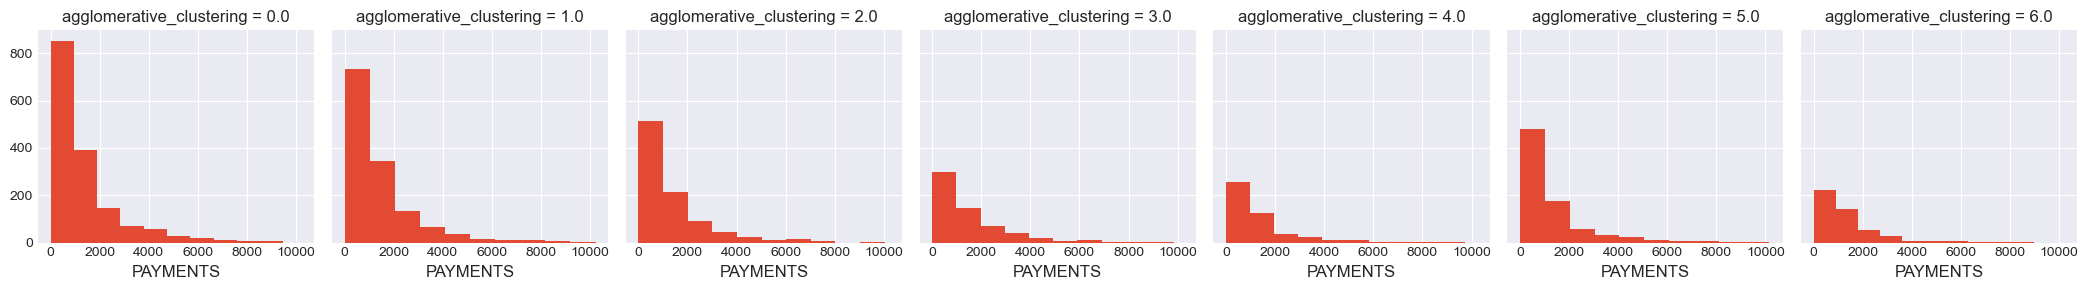

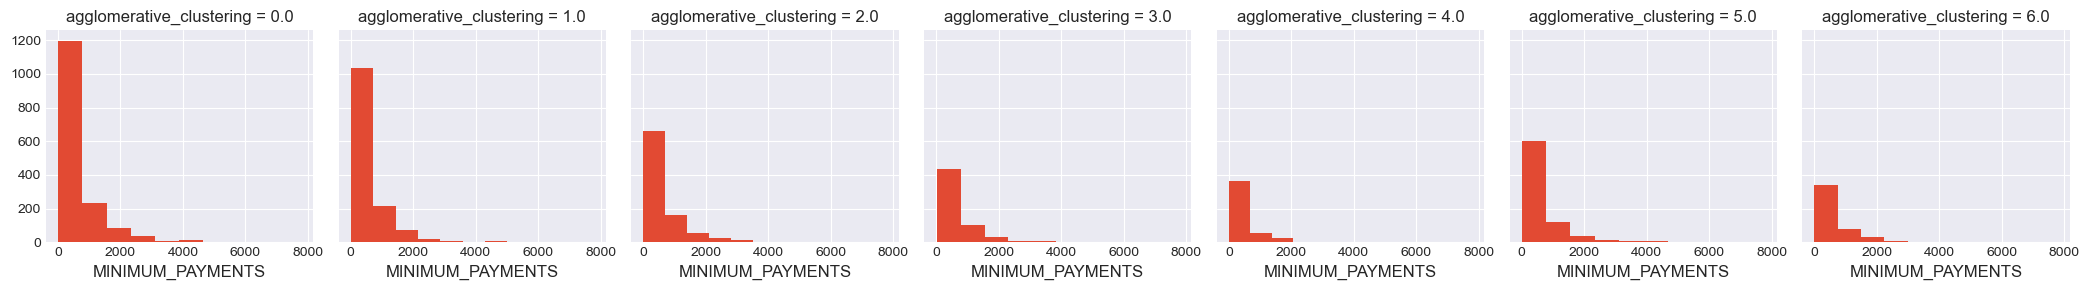

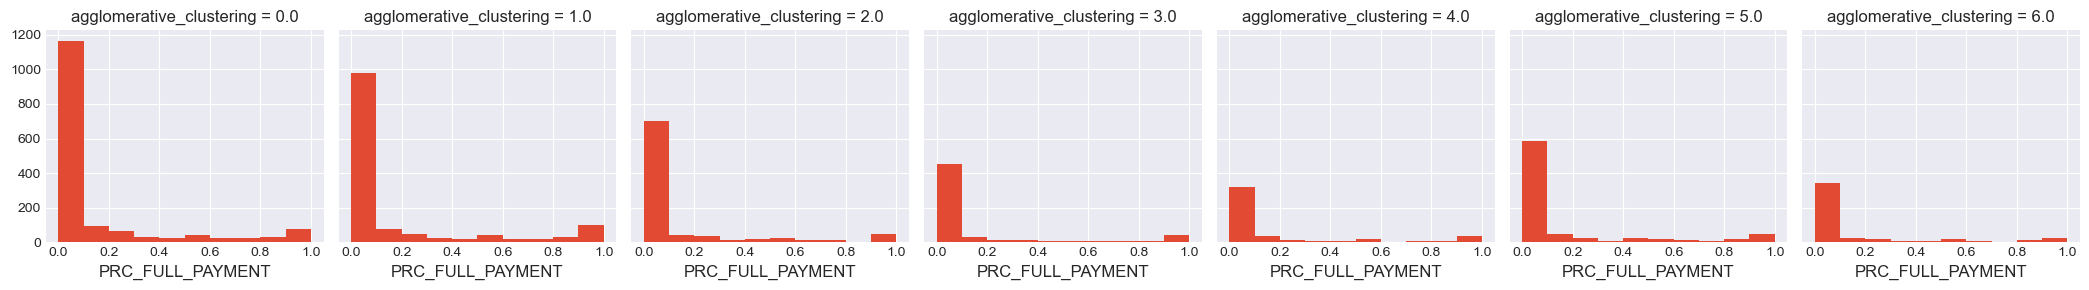

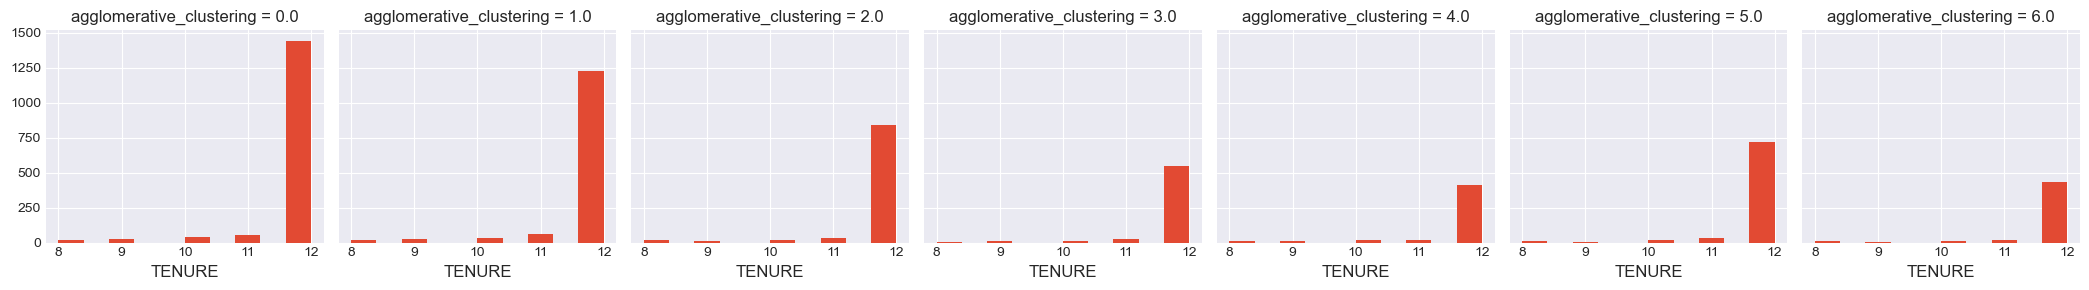

In [137]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_3, col ='agglomerative_clustering')
    g.map(plt.hist, cols)

## DBSCAN Clustering

Groups points based on density, identifying clusters and noise.

Can detect clusters of arbitrary shapes and is robust to outliers.

Key parameters: eps (max distance between points) and min_samples (min points per cluster).

Uses Isomap with 2 components for dimensionality reduction, preserving global structure and non-linear relationships.

Produces a lower-dimensional representation for visualization.

In [138]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(data_standardized)
dbscan_labels = dbscan.labels_

In [139]:
data_out_4 = pd.concat([data_out_3, pd.DataFrame({'dbscan': dbscan_labels})], axis = 1)

In [140]:
data_out_4.dbscan.unique()

array([-1.,  0.,  1.,  2.,  3.,  4.,  6.,  5.,  7.,  8.,  9., 15., 23.,
       10., 11., 12., 13., 14., 19., 16., 17., 20., 18., 24., 21., 22.,
       nan])

In [141]:
from sklearn.manifold import Isomap
n_neighbors = len(data_out_4.dbscan.unique())  
n_components = 2  # For 2D embedding
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components) 
isomap.fit(affinities)
X_isomap = isomap.transform(affinities)

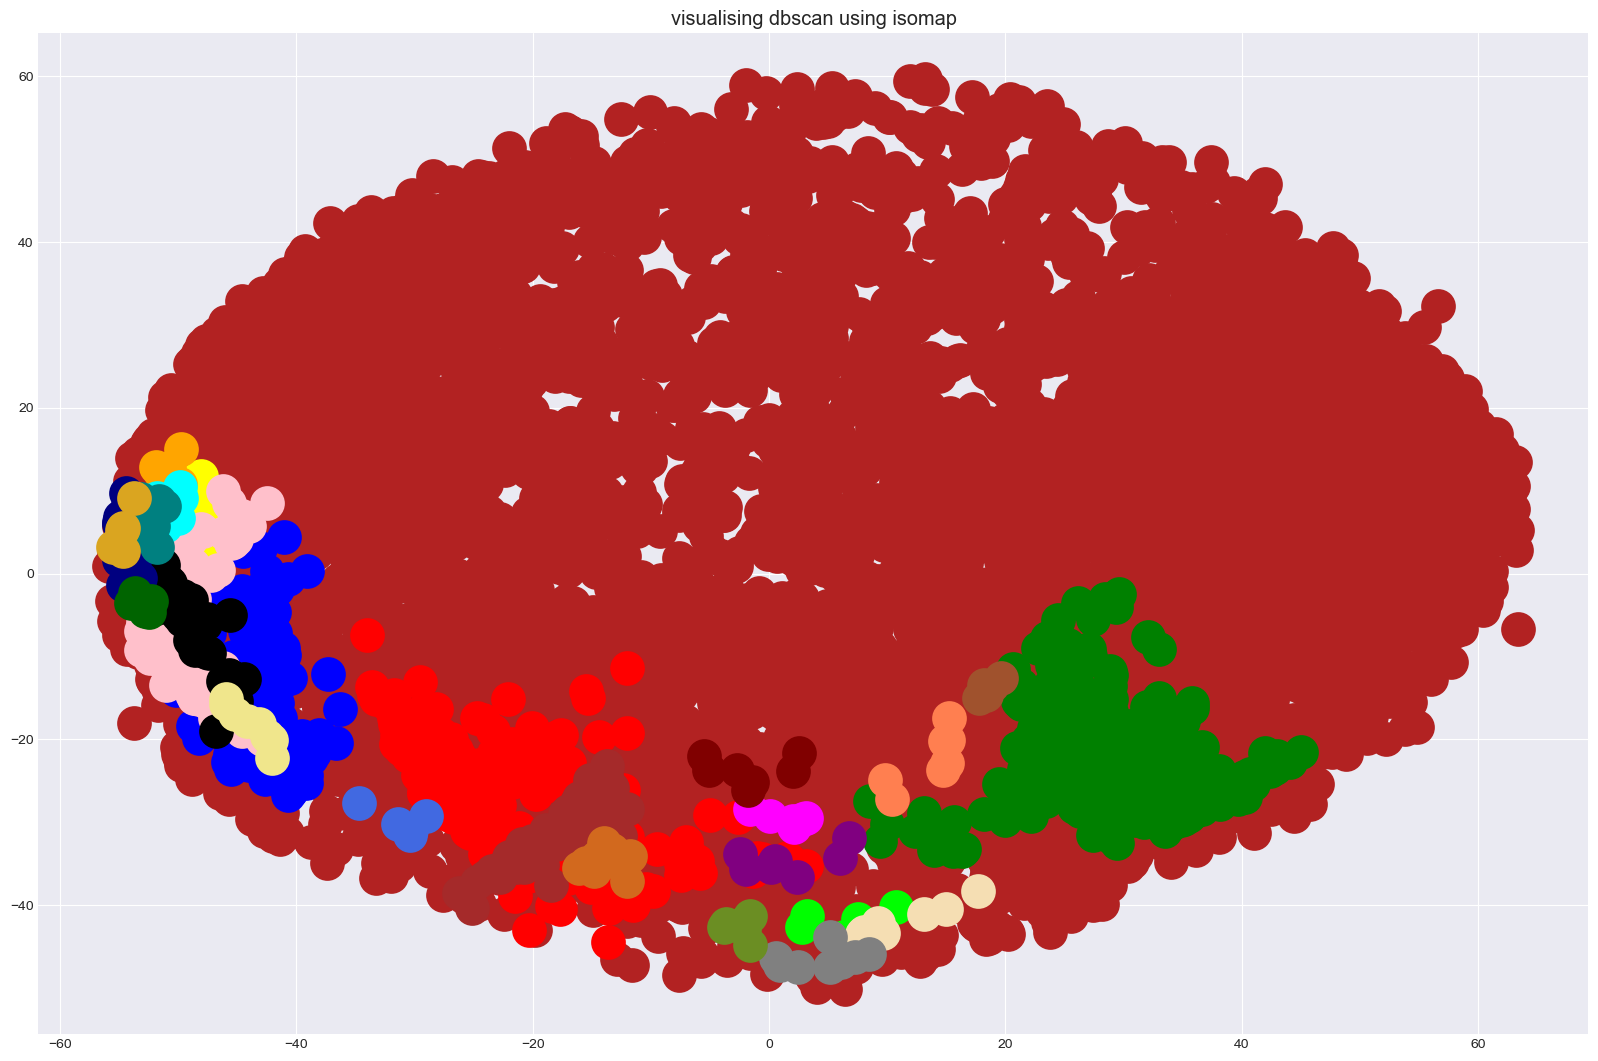

In [144]:
from matplotlib.colors import to_rgba
from matplotlib import colors as mcolors
x, y = X_isomap[:, 0], X_isomap[:, 1]


colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'orange', 5:'pink', 6:'brown', 7:'black',
          8:'khaki', 9:'lime', 10:'purple',
          11:'cyan', 12:'navy', 13:'chocolate', 14:'wheat', 15:'teal', 16:'magenta', 17:'coral',
          18: 'royalblue',19: 'maroon',20: 'grey',
          21:'darkgreen', 22:'olivedrab', 23:'goldenrod', -1:'firebrick', 24:'sienna'}
df = pd.DataFrame({'x': x, 'y':y, 'label':dbscan_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=25,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("visualising dbscan using isomap")
plt.show()

## Results 

In my project, I performed clustering analysis to understand customer transaction patterns and identify potential risks. I applied K-Means, which revealed distinct clusters representing different spending habits, helping segment customers effectively. I also used DBSCAN to detect outliers, which could indicate unusual or potentially fraudulent transactions. To visualize the results, I applied PCA, showing that these anomalies often appear as isolated points or at the edges of clusters. By combining these techniques, I was able to gain complementary insights, improve fraud detection, assess risk, and understand both typical and atypical customer behaviors, enabling more informed, data-driven decisions for financial management and targeted strategies.

## Conclusion & Summary 

**Objective:** Detect anomalies in financial transactions without relying on labeled fraud data.

**Techniques Used:**
K-Means: Forms structured clusters based on spending patterns.
DBSCAN: Identifies outliers that may correspond to fraudulent activity.
PCA: Reduces dimensionality for easier visualization and interpretation of clusters and anomalies.

**Key Insights:**
Clustering helps segment customers and highlight unusual behaviors.
Combining different unsupervised techniques provides complementary perspectives on potential fraud.

**Limitations:**
Real-world deployment requires validation against actual fraud cases.
Integration with supervised models can improve detection accuracy.
Models need periodic retraining to adapt to changing transaction patterns.

**Future Improvements:**
Combine clustering with graph-based fraud analysis to capture relational patterns.
Integrate deep learning-based anomaly detection for complex, non-linear patterns.
Incorporate time-series analysis to detect sequential anomalies in transactions.
Use ensemble approaches by combining multiple clustering and anomaly detection methods for better robustness.
Implement automated monitoring and alerting for real-time fraud detection.


Overall, this project demonstrates the power of unsupervised learning in detecting anomalies and provides a strong foundation for building more robust, real-world fraud detection systems.
